In [15]:
# Instalar librerías necesarias
%pip install pandas pyreadstat matplotlib scipy seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


# Análisis Exploratorio de Datos - Defunciones Guatemala (2009-2020)
## Inciso a: Descripción del Conjunto de Datos

Este notebook analiza los datos de defunciones en Guatemala de 2009 a 2020, describiendo:
- Número de variables y observaciones
- Tipo de cada variable
- Estructura general del dataset unificado

## 1. Importar Librerías Necesarias

In [16]:
import pandas as pd
import numpy as np
import pyreadstat
import os
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

print("Librerías importadas exitosamente")

Librerías importadas exitosamente


## 2. Cargar y Explorar Archivos .sav Individuales

Primero, identificamos todos los archivos .sav disponibles y exploramos su estructura.

In [17]:
# Definir la ruta a los datos (subir un nivel desde la carpeta actual)
data_path = Path(r'../data/defunciones/sav')

# Listar todos los archivos .sav
archivos_sav = sorted(list(data_path.glob('*.sav')))

print(f"Total de archivos .sav encontrados: {len(archivos_sav)}\n")
print("Archivos disponibles:")
for i, archivo in enumerate(archivos_sav, 1):
    print(f"{i}. {archivo.name}")

Total de archivos .sav encontrados: 12

Archivos disponibles:
1. 2009-defunciones.sav
2. 2010-defunciones.sav
3. 2011-defunciones.sav
4. 2012-defunciones.sav
5. 2013-defunciones.sav
6. 2014-defunciones.sav
7. 2015-defunciones.sav
8. 2016-defunciones.sav
9. 2017-defunciones.sav
10. 2018-defunciones.sav
11. 2019-defunciones.sav
12. 2020-defunciones.sav


In [18]:
# Explorar un archivo de ejemplo para entender la estructura
ejemplo_archivo = archivos_sav[0]
print(f"Cargando archivo de ejemplo: {ejemplo_archivo.name}\n")

# Cargar el archivo .sav con metadatos
df_ejemplo, meta = pyreadstat.read_sav(str(ejemplo_archivo))

print(f"Dimensiones: {df_ejemplo.shape[0]} observaciones x {df_ejemplo.shape[1]} variables")
print(f"\nPrimeras 5 filas:")
display(df_ejemplo.head())

print(f"\nInformación del DataFrame:")
display(df_ejemplo.info())

Cargando archivo de ejemplo: 2009-defunciones.sav

Dimensiones: 81726 observaciones x 28 variables

Primeras 5 filas:


,Depreg,Mupreg,Mesreg,Añoreg,Depocu,Mupocu,Areag,Sexo,Diaocu,Mesocu,...,Dnadif,Mnadif,Nacdif,Predif,Dredif,Mredif,Caudef,Asist,Ocur,Cerdef
0,1.0,0101,3.0,2017.0,1.0,0101,1.0,2.0,19.0,3.0,...,1.0,0101,320.0,320.0,1.0,0101,A010,1.0,4.0,1.0
1,8.0,0801,1.0,2017.0,8.0,0801,2.0,1.0,23.0,1.0,...,8.0,0801,320.0,320.0,8.0,0801,A010,5.0,6.0,9.0
2,4.0,0401,11.0,2017.0,4.0,0401,1.0,1.0,4.0,11.0,...,4.0,0405,320.0,9999.0,99.0,9999,A010,1.0,1.0,1.0
3,8.0,0801,5.0,2017.0,8.0,0801,2.0,1.0,23.0,5.0,...,14.0,1409,320.0,320.0,8.0,0801,A010,5.0,6.0,9.0
4,6.0,0601,7.0,2017.0,6.0,0601,1.0,2.0,7.0,7.0,...,6.0,0606,320.0,9999.0,99.0,9999,A010,1.0,1.0,1.0



Información del DataFrame:
<class 'pandas.DataFrame'>
RangeIndex: 81726 entries, 0 to 81725
Data columns (total 28 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Depreg   81726 non-null  float64
 1   Mupreg   81726 non-null  str    
 2   Mesreg   81726 non-null  float64
 3   Añoreg   81726 non-null  float64
 4   Depocu   81726 non-null  float64
 5   Mupocu   81726 non-null  str    
 6   Areag    81726 non-null  float64
 7   Sexo     81726 non-null  float64
 8   Diaocu   81726 non-null  float64
 9   Mesocu   81726 non-null  float64
 10  Añoocu   81726 non-null  float64
 11  Edadif   81726 non-null  float64
 12  Perdif   81726 non-null  float64
 13  Puedif   81726 non-null  float64
 14  Ecidif   81726 non-null  float64
 15  Escodif  81726 non-null  float64
 16  Ciuodif  81726 non-null  str    
 17  Pnadif   81726 non-null  float64
 18  Dnadif   81726 non-null  float64
 19  Mnadif   81726 non-null  str    
 20  Nacdif   81726 non-null  float64


None

## 3. Analizar Consistencia de Variables entre Años

Verificamos si las variables son consistentes entre todos los años o si hay cambios.

In [19]:
# Cargar todos los archivos y revisar estructura
estructura_por_anio = {}

for archivo in archivos_sav:
    year = archivo.stem.split('-')[0]  # Extrae el año del nombre del archivo
    df_temp, meta_temp = pyreadstat.read_sav(str(archivo))
    
    estructura_por_anio[year] = {
        'num_obs': df_temp.shape[0],
        'num_vars': df_temp.shape[1],
        'columnas': list(df_temp.columns),
        'tipos': df_temp.dtypes.to_dict()
    }

# Crear DataFrame de resumen
resumen_estructura = pd.DataFrame({
    'Año': list(estructura_por_anio.keys()),
    'Observaciones': [estructura_por_anio[y]['num_obs'] for y in estructura_por_anio.keys()],
    'Variables': [estructura_por_anio[y]['num_vars'] for y in estructura_por_anio.keys()]
})

print("Resumen de estructura por año:")
display(resumen_estructura)

# Verificar consistencia de columnas
todas_columnas = [set(estructura_por_anio[y]['columnas']) for y in estructura_por_anio.keys()]
columnas_comunes = set.intersection(*todas_columnas)
columnas_todas = set.union(*todas_columnas)

print(f"\nTotal de columnas únicas en todos los archivos: {len(columnas_todas)}")
print(f"Columnas comunes a todos los años: {len(columnas_comunes)}")
print(f"Columnas que varían entre años: {len(columnas_todas - columnas_comunes)}")

if columnas_todas != columnas_comunes:
    print("\n Las columnas NO son idénticas en todos los años. Habrá que manejar diferencias al unificar.")

Resumen de estructura por año:


,Año,Observaciones,Variables
0,2009,81726,28
1,2010,72748,26
2,2011,72354,26
3,2012,72657,27
4,2013,76639,28
5,2014,77807,27
6,2015,80876,28
7,2016,82565,28
8,2017,81726,28
9,2018,83071,27



Total de columnas únicas en todos los archivos: 35
Columnas comunes a todos los años: 19
Columnas que varían entre años: 16

 Las columnas NO son idénticas en todos los años. Habrá que manejar diferencias al unificar.


## 4. Unificar Datos de Todos los Años

Como necesitamos trabajar con más de 10 años de datos (según las instrucciones), procedemos a unificar todos los archivos en un solo DataFrame.

In [20]:
# Unificar todos los archivos
dataframes = []
metadatos = {}

for archivo in archivos_sav:
    year = archivo.stem.split('-')[0]
    print(f"Cargando: {archivo.name}...")
    
    df_temp, meta_temp = pyreadstat.read_sav(str(archivo))
    
    # Agregar columna de año
    df_temp['ANIO'] = int(year)
    
    dataframes.append(df_temp)
    metadatos[year] = meta_temp

# Concatenar todos los DataFrames
df_unificado = pd.concat(dataframes, axis=0, ignore_index=True, sort=False)

print(f"\n Datos unificados exitosamente!")
print(f"Total de observaciones: {df_unificado.shape[0]:,}")
print(f"Total de variables: {df_unificado.shape[1]:,}")
print(f"Años incluidos: {sorted(df_unificado['ANIO'].unique())}")

Cargando: 2009-defunciones.sav...
Cargando: 2010-defunciones.sav...
Cargando: 2011-defunciones.sav...
Cargando: 2012-defunciones.sav...
Cargando: 2013-defunciones.sav...
Cargando: 2014-defunciones.sav...
Cargando: 2015-defunciones.sav...
Cargando: 2016-defunciones.sav...
Cargando: 2017-defunciones.sav...
Cargando: 2018-defunciones.sav...
Cargando: 2019-defunciones.sav...
Cargando: 2020-defunciones.sav...

 Datos unificados exitosamente!
Total de observaciones: 963,770
Total de variables: 36
Años incluidos: [np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020)]


## 5. Conteo de Variables y Observaciones

Resumen del conjunto de datos unificado.

In [21]:
# Resumen por año
observaciones_por_anio = df_unificado.groupby('ANIO').size().reset_index(name='Observaciones')
print("Distribución de observaciones por año:")
display(observaciones_por_anio)

# Estadísticas generales
print(f"\n{'='*60}")
print(f"RESUMEN DEL CONJUNTO DE DATOS UNIFICADO")
print(f"{'='*60}")
print(f"Total de observaciones (registros): {df_unificado.shape[0]:,}")
print(f"Total de variables (columnas): {df_unificado.shape[1]:,}")
print(f"Período cubierto: {df_unificado['ANIO'].min()} - {df_unificado['ANIO'].max()}")
print(f"Años de datos: {df_unificado['ANIO'].nunique()} años")
print(f"{'='*60}")

Distribución de observaciones por año:


,ANIO,Observaciones
0,2009,81726
1,2010,72748
2,2011,72354
3,2012,72657
4,2013,76639
5,2014,77807
6,2015,80876
7,2016,82565
8,2017,81726
9,2018,83071



RESUMEN DEL CONJUNTO DE DATOS UNIFICADO
Total de observaciones (registros): 963,770
Total de variables (columnas): 36
Período cubierto: 2009 - 2020
Años de datos: 12 años


## 6. Clasificación de Tipos de Variables

Analizamos cada variable para clasificarla como numérica (continua/discreta) o categórica.

In [22]:
# Clasificar variables
clasificacion_vars = []

for columna in df_unificado.columns:
    dtype = df_unificado[columna].dtype
    num_unicos = df_unificado[columna].nunique()
    valores_ejemplo = df_unificado[columna].dropna().head(3).tolist()
    
    # Clasificar tipo de variable
    if dtype in ['int64', 'float64']:
        if num_unicos <= 20:
            tipo_var = 'Numérica Discreta'
        else:
            tipo_var = 'Numérica Continua'
    else:
        tipo_var = 'Categórica'
    
    clasificacion_vars.append({
        'Variable': columna,
        'Tipo_Dato': str(dtype),
        'Tipo_Variable': tipo_var,
        'Valores_Únicos': num_unicos,
        'Ejemplo_Valores': str(valores_ejemplo[:3])
    })

df_clasificacion = pd.DataFrame(clasificacion_vars)

# Mostrar resumen
print("Resumen de tipos de variables:")
print(df_clasificacion['Tipo_Variable'].value_counts())
print(f"\nTotal de variables: {len(df_clasificacion)}")

# Mostrar tabla completa
print("\nDetalle de todas las variables:")
display(df_clasificacion)

Resumen de tipos de variables:
Tipo_Variable
Numérica Discreta    16
Categórica           11
Numérica Continua     9
Name: count, dtype: int64

Total de variables: 36

Detalle de todas las variables:


,Variable,Tipo_Dato,Tipo_Variable,Valores_Únicos,Ejemplo_Valores
0,Depreg,float64,Numérica Continua,22,"[1.0, 8.0, 4.0]"
1,Mupreg,str,Categórica,340,"['0101', '0801', '0401']"
2,Mesreg,float64,Numérica Discreta,12,"[3.0, 1.0, 11.0]"
3,Añoreg,float64,Numérica Discreta,12,"[2017.0, 2017.0, 2017.0]"
4,Depocu,float64,Numérica Continua,22,"[1.0, 8.0, 4.0]"
5,Mupocu,str,Categórica,340,"['0101', '0801', '0401']"
6,Areag,float64,Numérica Discreta,3,"[1.0, 2.0, 1.0]"
7,Sexo,float64,Numérica Discreta,2,"[2.0, 1.0, 1.0]"
8,Diaocu,float64,Numérica Continua,31,"[19.0, 23.0, 4.0]"
9,Mesocu,float64,Numérica Discreta,12,"[3.0, 1.0, 11.0]"


## 7. Tabla de Resumen Completo con Metadatos

Generamos una tabla comprehensiva con información detallada de cada variable, incluyendo etiquetas de los archivos SPSS.

In [23]:
# Obtener etiquetas de variables desde los metadatos SPSS
meta_ejemplo = metadatos[list(metadatos.keys())[0]]  # Usar metadatos del primer año

resumen_completo = []

for columna in df_unificado.columns:
    # Obtener etiqueta desde metadatos si existe
    etiqueta = meta_ejemplo.column_names_to_labels.get(columna, 'Sin descripción')
    
    # Información básica
    num_missing = df_unificado[columna].isna().sum()
    pct_missing = (num_missing / len(df_unificado)) * 100
    num_unicos = df_unificado[columna].nunique()
    
    # Tipo de variable
    tipo_fila = df_clasificacion[df_clasificacion['Variable'] == columna]['Tipo_Variable'].values
    tipo_var = tipo_fila[0] if len(tipo_fila) > 0 else 'N/A'
    
    resumen_completo.append({
        'Variable': columna,
        'Descripción': etiqueta,
        'Tipo': tipo_var,
        'Tipo_Dato': str(df_unificado[columna].dtype),
        'Valores_Únicos': num_unicos,
        'Valores_Faltantes': num_missing,
        '% Faltantes': f"{pct_missing:.2f}%"
    })

df_resumen = pd.DataFrame(resumen_completo)

print("TABLA RESUMEN COMPLETA DE VARIABLES")
print("="*80)
display(df_resumen)

# Guardar a CSV para referencia
df_resumen.to_csv('resumen_variables_defunciones.csv', index=False, encoding='utf-8-sig')
print("\n Tabla guardada en: resumen_variables_defunciones.csv")

TABLA RESUMEN COMPLETA DE VARIABLES


,Variable,Descripción,Tipo,Tipo_Dato,Valores_Únicos,Valores_Faltantes,% Faltantes
0,Depreg,Departamento de registro,Numérica Continua,float64,22,0,0.00%
1,Mupreg,Municipio de registro,Categórica,str,340,145102,15.06%
2,Mesreg,Mes de registro,Numérica Discreta,float64,12,0,0.00%
3,Añoreg,Año de registro,Numérica Discreta,float64,12,0,0.00%
4,Depocu,Departamento de ocurrencia,Numérica Continua,float64,22,0,0.00%
5,Mupocu,Municipio de ocurrencia,Categórica,str,340,145102,15.06%
6,Areag,Área geográfica de ocurrencia,Numérica Discreta,float64,3,264672,27.46%
7,Sexo,Sexo del difunto(a),Numérica Discreta,float64,2,0,0.00%
8,Diaocu,Día de ocurrencia,Numérica Continua,float64,31,0,0.00%
9,Mesocu,Mes de ocurrencia,Numérica Discreta,float64,12,0,0.00%



 Tabla guardada en: resumen_variables_defunciones.csv


## 8. Visualización de la Distribución de Tipos de Variables

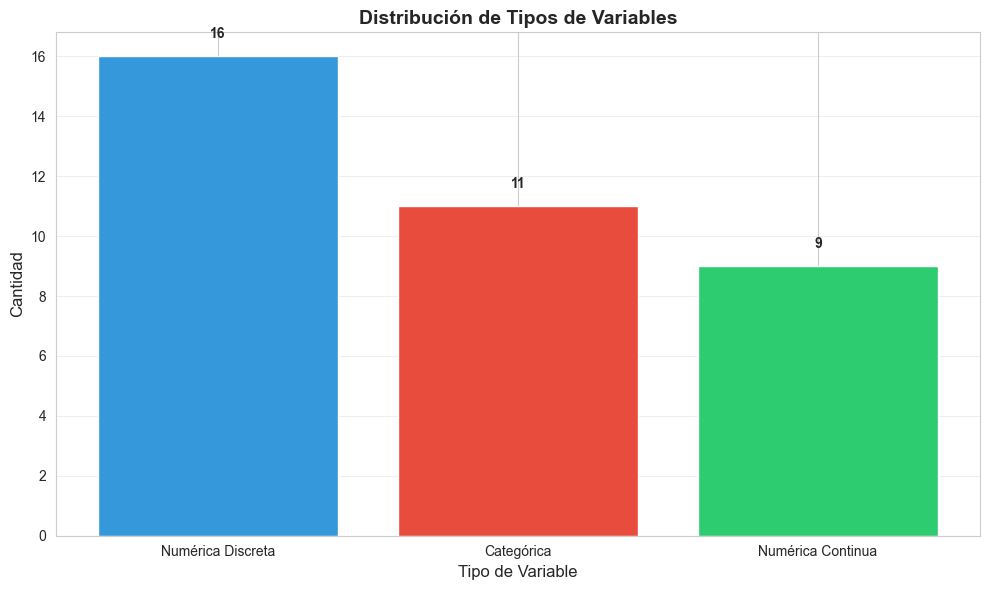


Resumen estadístico:
  Numérica Discreta: 16 variables (44.4%)
  Categórica: 11 variables (30.6%)
  Numérica Continua: 9 variables (25.0%)


In [24]:
import matplotlib.pyplot as plt

# Contar tipos de variables
conteo_tipos = df_resumen['Tipo'].value_counts()

# Crear visualización
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Gráfico de barras
ax.bar(conteo_tipos.index, conteo_tipos.values, color=['#3498db', '#e74c3c', '#2ecc71'])
ax.set_xlabel('Tipo de Variable', fontsize=12)
ax.set_ylabel('Cantidad', fontsize=12)
ax.set_title('Distribución de Tipos de Variables', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

# Añadir valores en las barras
for i, v in enumerate(conteo_tipos.values):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\nResumen estadístico:")
for tipo, cantidad in conteo_tipos.items():
    porcentaje = (cantidad / len(df_resumen)) * 100
    print(f"  {tipo}: {cantidad} variables ({porcentaje:.1f}%)")

## 9. Análisis de Valores Faltantes

Identificamos variables con alta proporción de datos faltantes.

Variables con valores faltantes: 16 de 36

Top 10 variables con más valores faltantes:


,Variable,Descripción,Tipo,Tipo_Dato,Valores_Únicos,Valores_Faltantes,% Faltantes
34,mnadif,Sin descripción,Categórica,str,335,891022,92.45%
35,caudef.descrip,Sin descripción,Categórica,str,1452,887131,92.05%
30,mupocu,Sin descripción,Categórica,str,333,818668,84.94%
29,mupreg,Sin descripción,Categórica,str,333,818668,84.94%
31,añoocu,Sin descripción,Numérica Discreta,float64,2,818668,84.94%
33,Ocudif,Sin descripción,Categórica,str,255,746011,77.41%
32,Getdif,Sin descripción,Numérica Discreta,float64,3,746011,77.41%
10,Añoocu,Año de ocurrencia,Numérica Discreta,float64,6,372205,38.62%
6,Areag,Área geográfica de ocurrencia,Numérica Discreta,float64,3,264672,27.46%
16,Ciuodif,Ocupación (Subgrupos CIUO-08) del difunto (a),Categórica,str,46,217759,22.59%


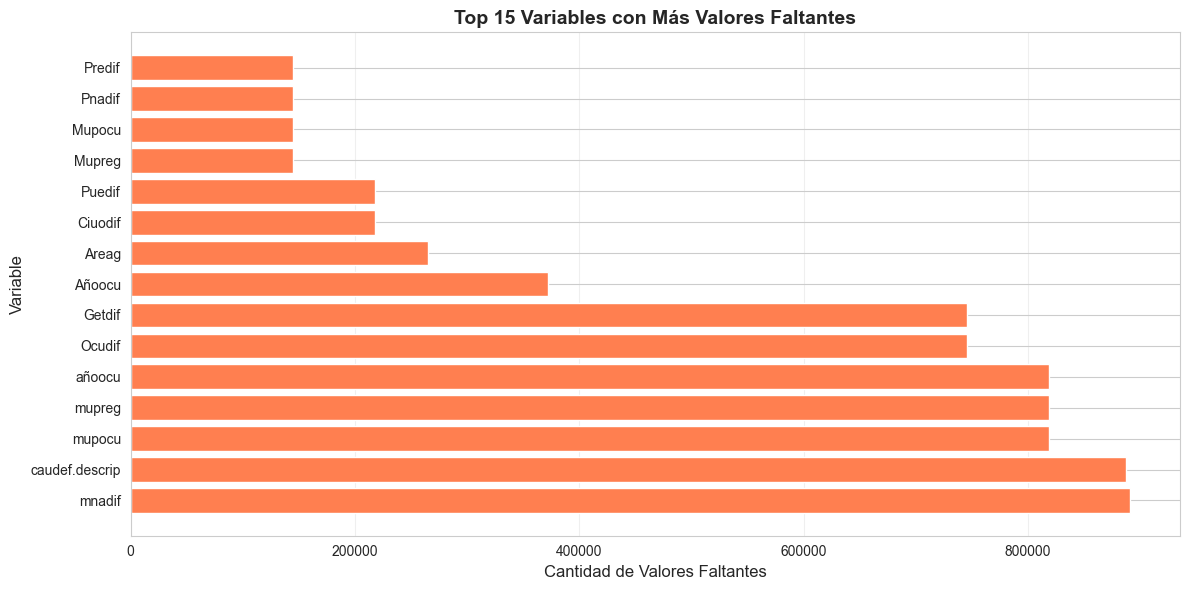

In [25]:
# Variables con valores faltantes
df_missing = df_resumen[df_resumen['Valores_Faltantes'] > 0].sort_values('Valores_Faltantes', ascending=False)

print(f"Variables con valores faltantes: {len(df_missing)} de {len(df_resumen)}")
print(f"\nTop 10 variables con más valores faltantes:")
display(df_missing.head(10))

# Visualizar
if len(df_missing) > 0:
    fig, ax = plt.subplots(figsize=(12, 6))
    
    top_missing = df_missing.head(15)
    ax.barh(top_missing['Variable'], top_missing['Valores_Faltantes'], color='coral')
    ax.set_xlabel('Cantidad de Valores Faltantes', fontsize=12)
    ax.set_ylabel('Variable', fontsize=12)
    ax.set_title('Top 15 Variables con Más Valores Faltantes', fontsize=14, fontweight='bold')
    ax.grid(axis='x', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

## Conclusiones del Inciso a

### Resumen de hallazgos:

In [26]:
print("="*80)
print("CONCLUSIONES - INCISO A: DESCRIPCIÓN DEL CONJUNTO DE DATOS")
print("="*80)
print()
print("1. DIMENSIONES DEL DATASET:")
print(f"   - Total de observaciones: {df_unificado.shape[0]:,} registros de defunciones")
print(f"   - Total de variables: {df_unificado.shape[1]} variables")
print(f"   - Período: {df_unificado['ANIO'].min()}-{df_unificado['ANIO'].max()} ({df_unificado['ANIO'].nunique()} años)")
print()

print("2. CLASIFICACIÓN DE VARIABLES:")
for tipo, cantidad in df_resumen['Tipo'].value_counts().items():
    porcentaje = (cantidad / len(df_resumen)) * 100
    print(f"   - {tipo}: {cantidad} variables ({porcentaje:.1f}%)")
print()

print("3. CALIDAD DE DATOS:")
total_con_missing = len(df_resumen[df_resumen['Valores_Faltantes'] > 0])
pct_con_missing = (total_con_missing / len(df_resumen)) * 100
print(f"   - Variables con datos faltantes: {total_con_missing} ({pct_con_missing:.1f}%)")
print(f"   - Variables completas: {len(df_resumen) - total_con_missing}")
print()

CONCLUSIONES - INCISO A: DESCRIPCIÓN DEL CONJUNTO DE DATOS

1. DIMENSIONES DEL DATASET:
   - Total de observaciones: 963,770 registros de defunciones
   - Total de variables: 36 variables
   - Período: 2009-2020 (12 años)

2. CLASIFICACIÓN DE VARIABLES:
   - Numérica Discreta: 16 variables (44.4%)
   - Categórica: 11 variables (30.6%)
   - Numérica Continua: 9 variables (25.0%)

3. CALIDAD DE DATOS:
   - Variables con datos faltantes: 16 (44.4%)
   - Variables completas: 20



# Inciso b: Análisis Estadístico de Variables

## Resumen de Variables Numéricas y Pruebas de Normalidad

En esta sección analizaremos:
- Estadísticas descriptivas de las variables numéricas
- Pruebas de normalidad (Shapiro-Wilk, Kolmogorov-Smirnov)
- Identificación del tipo de distribución
- Tablas de frecuencia para variables categóricas

## 1. Separar Variables Numéricas y Categóricas

Primero identificamos y separamos las variables numéricas de las categóricas.

In [27]:
# Separar variables numéricas y categóricas
variables_numericas = df_unificado.select_dtypes(include=['int64', 'float64']).columns.tolist()
variables_categoricas = df_unificado.select_dtypes(include=['object']).columns.tolist()

print(f"Variables Numéricas ({len(variables_numericas)}):")
print(variables_numericas)
print(f"\nVariables Categóricas ({len(variables_categoricas)}):")
print(variables_categoricas)

Variables Numéricas (25):
['Depreg', 'Mesreg', 'Añoreg', 'Depocu', 'Areag', 'Sexo', 'Diaocu', 'Mesocu', 'Añoocu', 'Edadif', 'Perdif', 'Puedif', 'Ecidif', 'Escodif', 'Pnadif', 'Dnadif', 'Nacdif', 'Predif', 'Dredif', 'Asist', 'Ocur', 'Cerdef', 'ANIO', 'añoocu', 'Getdif']

Variables Categóricas (11):
['Mupreg', 'Mupocu', 'Ciuodif', 'Mnadif', 'Mredif', 'Caudef', 'mupreg', 'mupocu', 'Ocudif', 'mnadif', 'caudef.descrip']


## 2. Resumen Estadístico de Variables Numéricas

Calculamos las estadísticas descriptivas principales para todas las variables numéricas.

In [28]:
# Resumen estadístico completo de variables numéricas
print("="*100)
print("RESUMEN ESTADÍSTICO DE VARIABLES NUMÉRICAS")
print("="*100)

resumen_estadistico = df_unificado[variables_numericas].describe().T

# Añadir estadísticas adicionales
resumen_estadistico['mediana'] = df_unificado[variables_numericas].median()
resumen_estadistico['moda'] = df_unificado[variables_numericas].mode().iloc[0]
resumen_estadistico['asimetria'] = df_unificado[variables_numericas].skew()
resumen_estadistico['curtosis'] = df_unificado[variables_numericas].kurtosis()
resumen_estadistico['missing'] = df_unificado[variables_numericas].isna().sum()
resumen_estadistico['missing_%'] = (df_unificado[variables_numericas].isna().sum() / len(df_unificado) * 100).round(2)

# Reordenar columnas
resumen_estadistico = resumen_estadistico[['count', 'mean', 'mediana', 'moda', 'std', 'min', '25%', '50%', '75%', 'max', 'asimetria', 'curtosis', 'missing', 'missing_%']]

display(resumen_estadistico)

RESUMEN ESTADÍSTICO DE VARIABLES NUMÉRICAS


,count,mean,mediana,moda,std,min,25%,50%,75%,max,asimetria,curtosis,missing,missing_%
Depreg,963770.0,8.632490,9.0,1.0,6.702303,1.0,1.0,9.0,14.0,22.0,0.332911,-1.154519,0,0.00
Mesreg,963770.0,6.495521,7.0,7.0,3.440874,1.0,4.0,7.0,9.0,12.0,-0.023170,-1.193982,0,0.00
Añoreg,963770.0,2015.419109,2016.0,2017.0,3.085324,2010.0,2013.0,2016.0,2018.0,2021.0,-0.212667,-1.096430,0,0.00
Depocu,963770.0,8.600749,9.0,1.0,6.678442,1.0,1.0,9.0,14.0,22.0,0.339247,-1.148370,0,0.00
Areag,699098.0,1.579916,1.0,1.0,1.104606,1.0,1.0,1.0,2.0,9.0,5.231539,32.557222,264672,27.46
Sexo,963770.0,1.437153,1.0,1.0,0.496035,1.0,1.0,1.0,2.0,2.0,0.253398,-1.935794,0,0.00
Diaocu,963770.0,15.670680,16.0,1.0,8.815923,1.0,8.0,16.0,23.0,31.0,0.012102,-1.197483,0,0.00
Mesocu,963770.0,6.554779,7.0,7.0,3.435889,1.0,4.0,7.0,10.0,12.0,-0.024801,-1.190949,0,0.00
Añoocu,591565.0,2017.503676,2017.0,2017.0,1.616330,2015.0,2016.0,2017.0,2019.0,2020.0,0.087863,-1.074925,372205,38.62
Edadif,963770.0,61.734076,61.0,1.0,90.256586,0.0,31.0,61.0,78.0,999.0,9.260185,93.605028,0,0.00


## 3. Pruebas de Normalidad

Para evaluar si las variables numéricas siguen una distribución normal, utilizaremos:
- **Test de Shapiro-Wilk** (para muestras pequeñas, usaremos una muestra aleatoria)
- **Test de Kolmogorov-Smirnov** (para muestras grandes)
- **Análisis de asimetría y curtosis**
- **Gráficos Q-Q Plot y histogramas**

In [29]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo de gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 6)

# Realizar pruebas de normalidad
resultados_normalidad = []

print("="*100)
print("PRUEBAS DE NORMALIDAD PARA VARIABLES NUMÉRICAS")
print("="*100)
print("\nNota: Usando muestra de 5000 registros para Shapiro-Wilk (limitación del test)\n")

for variable in variables_numericas:
    # Remover valores nulos
    datos_limpios = df_unificado[variable].dropna()
    
    if len(datos_limpios) > 0:
        # Tomar muestra para Shapiro-Wilk (máximo 5000 por limitaciones del test)
        muestra = datos_limpios.sample(min(5000, len(datos_limpios)), random_state=42)
        
        # Test de Shapiro-Wilk
        if len(muestra) >= 3:
            shapiro_stat, shapiro_p = stats.shapiro(muestra)
        else:
            shapiro_stat, shapiro_p = None, None
        
        # Test de Kolmogorov-Smirnov
        ks_stat, ks_p = stats.kstest(datos_limpios, 'norm', args=(datos_limpios.mean(), datos_limpios.std()))
        
        # Asimetría y Curtosis
        asimetria = datos_limpios.skew()
        curtosis = datos_limpios.kurtosis()
        
        # Clasificación de normalidad
        es_normal = (shapiro_p > 0.05 if shapiro_p else False) and (ks_p > 0.05)
        
        resultados_normalidad.append({
            'Variable': variable,
            'N': len(datos_limpios),
            'Shapiro_W': shapiro_stat,
            'Shapiro_p': shapiro_p,
            'KS_stat': ks_stat,
            'KS_p': ks_p,
            'Asimetría': asimetria,
            'Curtosis': curtosis,
            'Es_Normal': 'Sí' if es_normal else 'No'
        })

# Crear DataFrame de resultados
df_normalidad = pd.DataFrame(resultados_normalidad)

# Formatear para mejor visualización
df_normalidad_display = df_normalidad.copy()
df_normalidad_display['Shapiro_p'] = df_normalidad_display['Shapiro_p'].apply(lambda x: f"{x:.4e}" if x is not None else 'N/A')
df_normalidad_display['KS_p'] = df_normalidad_display['KS_p'].apply(lambda x: f"{x:.4e}")
df_normalidad_display['Asimetría'] = df_normalidad_display['Asimetría'].apply(lambda x: f"{x:.2f}")
df_normalidad_display['Curtosis'] = df_normalidad_display['Curtosis'].apply(lambda x: f"{x:.2f}")

display(df_normalidad_display)

# Resumen de normalidad
print(f"\n{'='*100}")
print("RESUMEN DE NORMALIDAD:")
print(f"{'='*100}")
normal_count = (df_normalidad['Es_Normal'] == 'Sí').sum()
no_normal_count = (df_normalidad['Es_Normal'] == 'No').sum()
print(f"Variables que siguen distribución normal: {normal_count} ({normal_count/len(df_normalidad)*100:.1f}%)")
print(f"Variables que NO siguen distribución normal: {no_normal_count} ({no_normal_count/len(df_normalidad)*100:.1f}%)")

PRUEBAS DE NORMALIDAD PARA VARIABLES NUMÉRICAS

Nota: Usando muestra de 5000 registros para Shapiro-Wilk (limitación del test)



,Variable,N,Shapiro_W,Shapiro_p,KS_stat,KS_p,Asimetría,Curtosis,Es_Normal
0,Depreg,963770,0.896319,8.0546e-50,0.168293,0.0000e+00,0.33,-1.15,No
1,Mesreg,963770,0.942726,2.7033e-40,0.095703,0.0000e+00,-0.02,-1.19,No
2,Añoreg,963770,0.942470,2.3137e-40,0.142083,0.0000e+00,-0.21,-1.10,No
3,Depocu,963770,0.896486,8.5768e-50,0.166369,0.0000e+00,0.34,-1.15,No
4,Areag,699098,0.398184,3.3013e-84,0.334422,0.0000e+00,5.23,32.56,No
5,Sexo,963770,0.628916,7.7980e-74,0.373768,0.0000e+00,0.25,-1.94,No
6,Diaocu,963770,0.953057,2.4574e-37,0.073692,0.0000e+00,0.01,-1.20,No
7,Mesocu,963770,0.943188,3.5867e-40,0.095932,0.0000e+00,-0.02,-1.19,No
8,Añoocu,591565,0.914657,1.3989e-46,0.174924,0.0000e+00,0.09,-1.07,No
9,Edadif,963770,0.283413,4.0062e-88,0.336113,0.0000e+00,9.26,93.61,No



RESUMEN DE NORMALIDAD:
Variables que siguen distribución normal: 0 (0.0%)
Variables que NO siguen distribución normal: 25 (100.0%)


### Interpretación de Asimetría y Curtosis

- **Asimetría (Skewness)**:
  - = 0: Distribución simétrica
  - \> 0: Cola derecha (sesgo positivo)
  - < 0: Cola izquierda (sesgo negativo)
  
- **Curtosis**:
  - = 0: Similar a distribución normal
  - \> 0: Leptocúrtica (colas más pesadas, pico más alto)
  - < 0: Platicúrtica (colas más ligeras, pico más bajo)

## 4. Visualización de Distribuciones - Variables Numéricas Clave

Analizaremos gráficamente las variables numéricas más importantes.

Analizando 7 variables clave: ['Edadif', 'Sexo', 'Mesreg', 'Mesocu', 'Depreg', 'Depocu', 'ANIO']



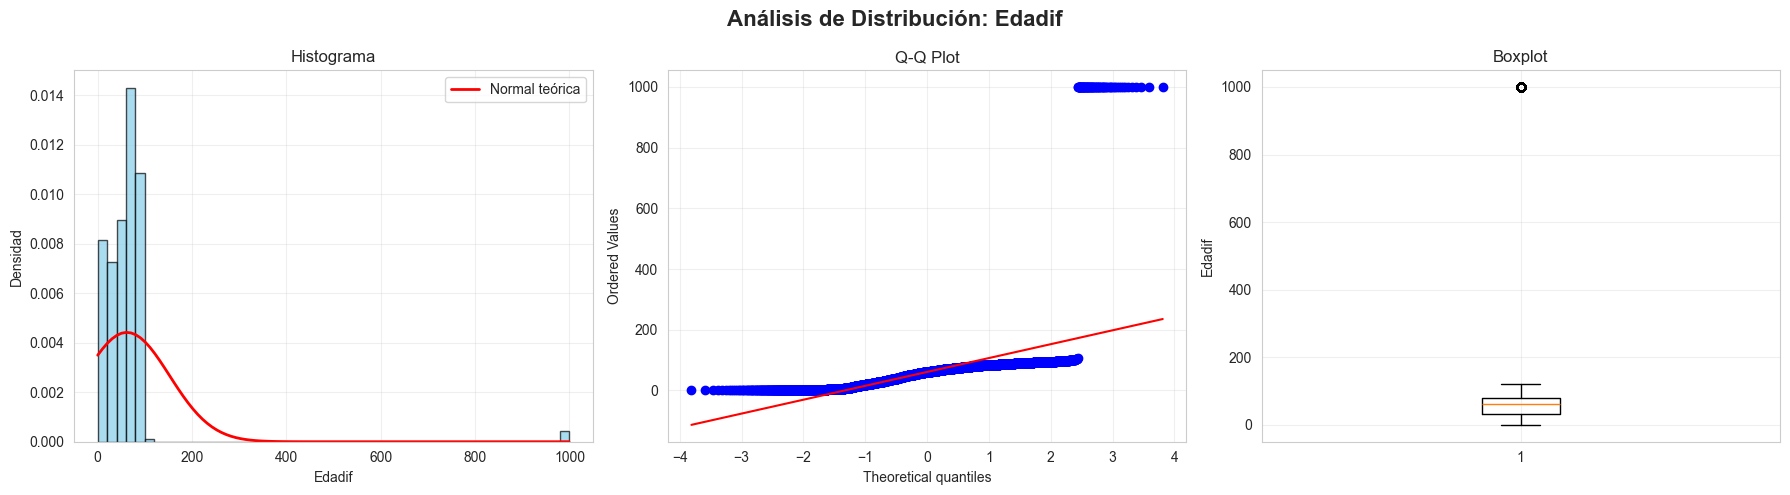


Estadísticas de Edadif:
  - Media: 61.73
  - Mediana: 61.00
  - Desv. Estándar: 90.26
  - Asimetría: 9.260184719542396
  - Curtosis: 93.60502825341513
  - ¿Es normal?: No
--------------------------------------------------------------------------------


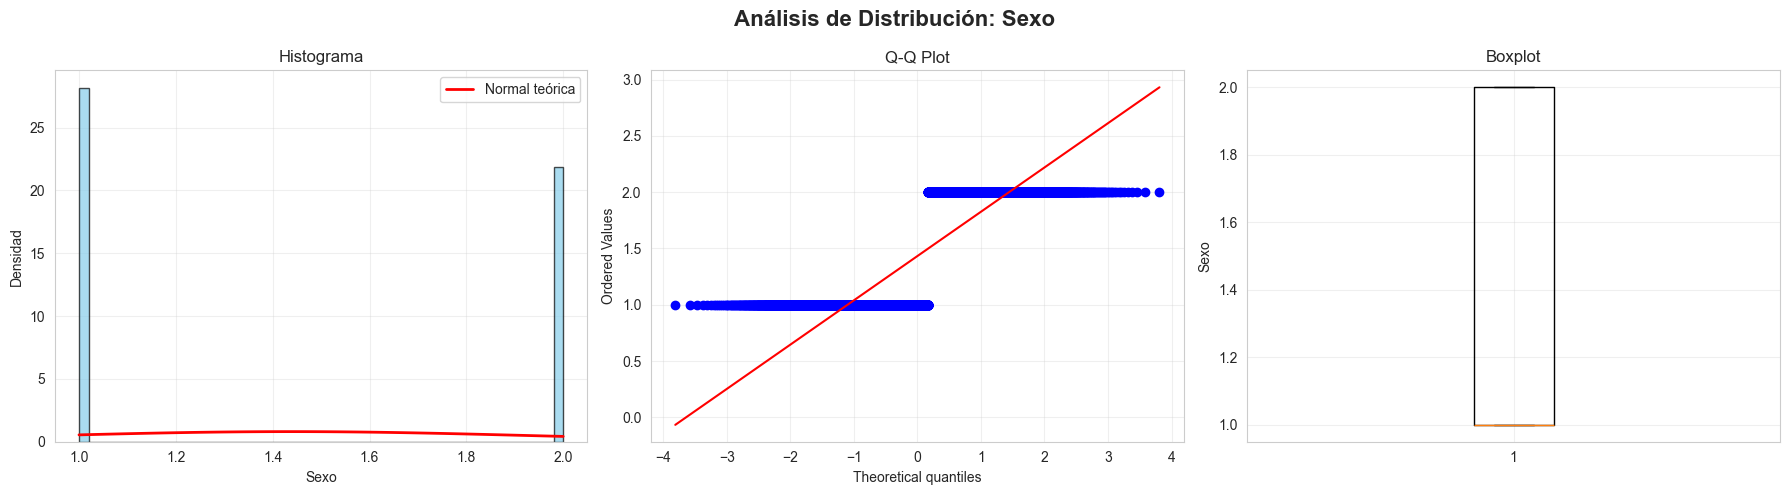


Estadísticas de Sexo:
  - Media: 1.44
  - Mediana: 1.00
  - Desv. Estándar: 0.50
  - Asimetría: 0.2533978502872156
  - Curtosis: -1.9357935466017517
  - ¿Es normal?: No
--------------------------------------------------------------------------------


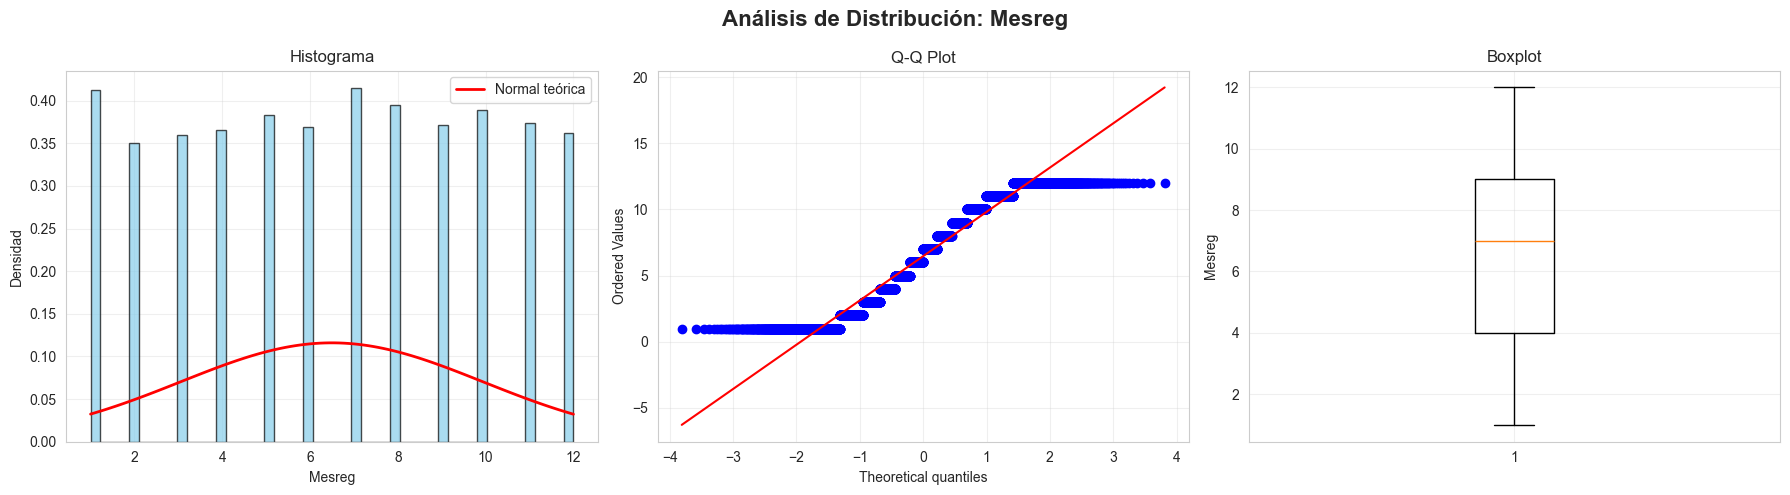


Estadísticas de Mesreg:
  - Media: 6.50
  - Mediana: 7.00
  - Desv. Estándar: 3.44
  - Asimetría: -0.023169585325010397
  - Curtosis: -1.1939824527011873
  - ¿Es normal?: No
--------------------------------------------------------------------------------


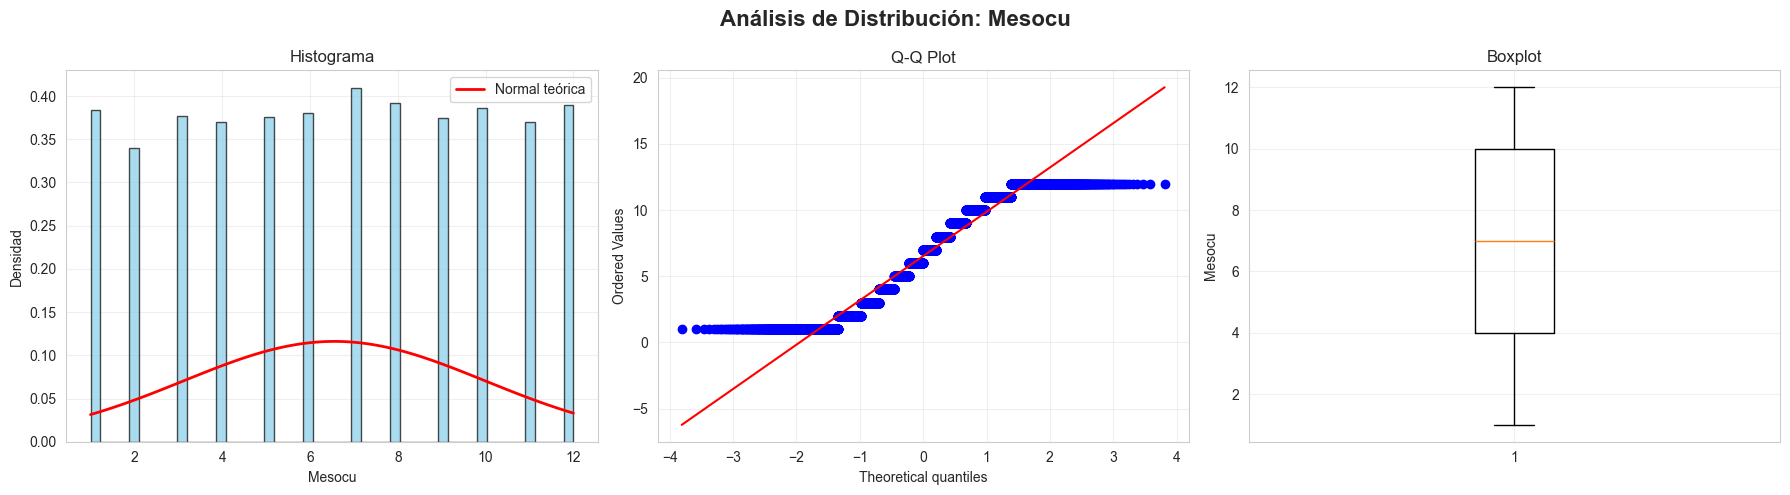


Estadísticas de Mesocu:
  - Media: 6.55
  - Mediana: 7.00
  - Desv. Estándar: 3.44
  - Asimetría: -0.024801133714246082
  - Curtosis: -1.1909485888240638
  - ¿Es normal?: No
--------------------------------------------------------------------------------


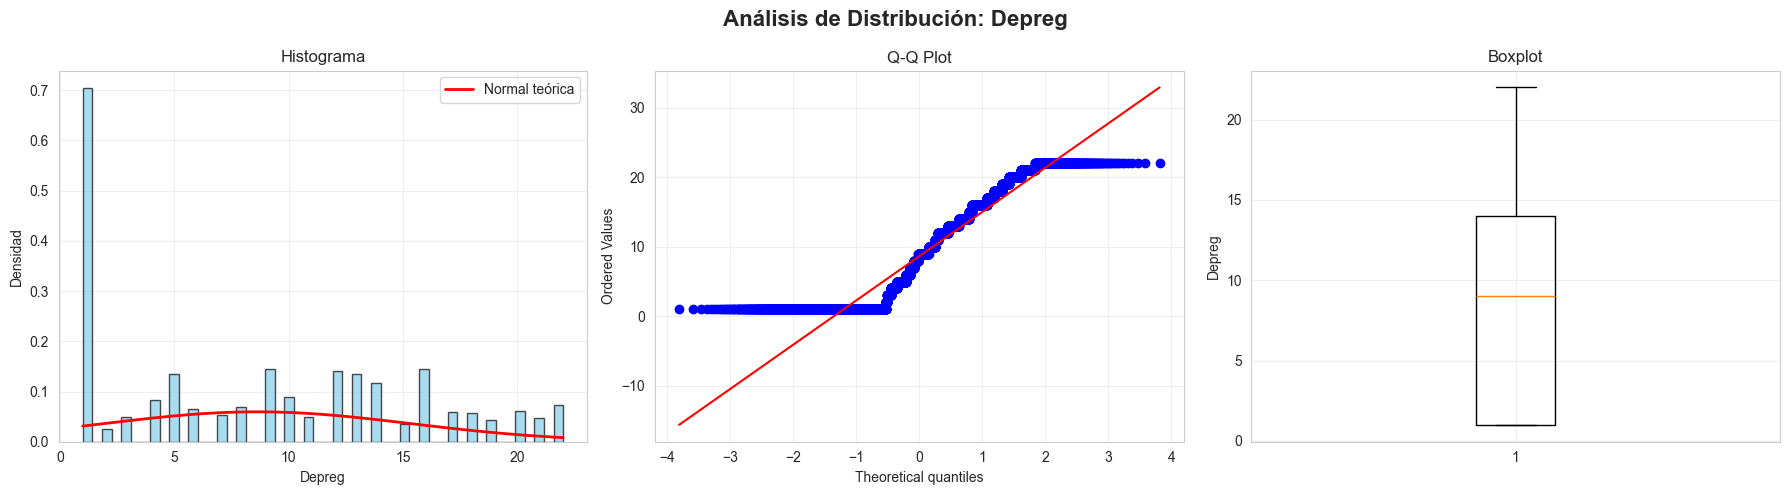


Estadísticas de Depreg:
  - Media: 8.63
  - Mediana: 9.00
  - Desv. Estándar: 6.70
  - Asimetría: 0.3329107153529144
  - Curtosis: -1.1545187687587826
  - ¿Es normal?: No
--------------------------------------------------------------------------------


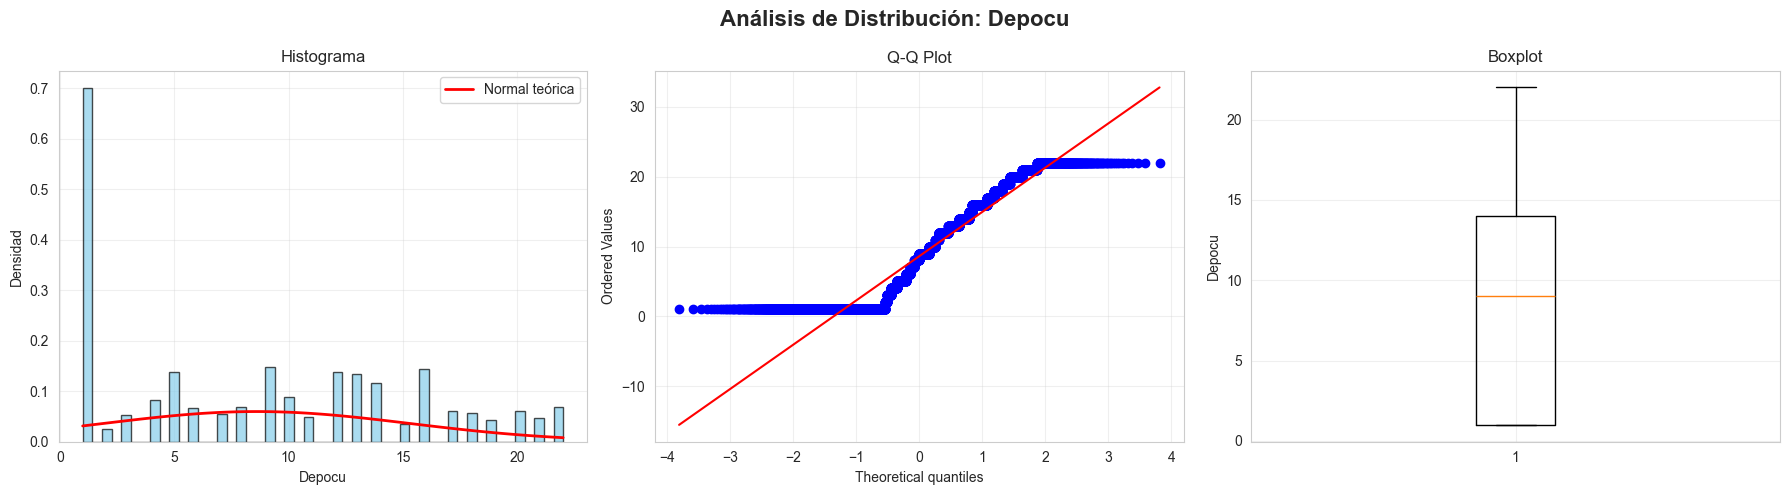


Estadísticas de Depocu:
  - Media: 8.60
  - Mediana: 9.00
  - Desv. Estándar: 6.68
  - Asimetría: 0.3392471464085139
  - Curtosis: -1.1483704661788192
  - ¿Es normal?: No
--------------------------------------------------------------------------------


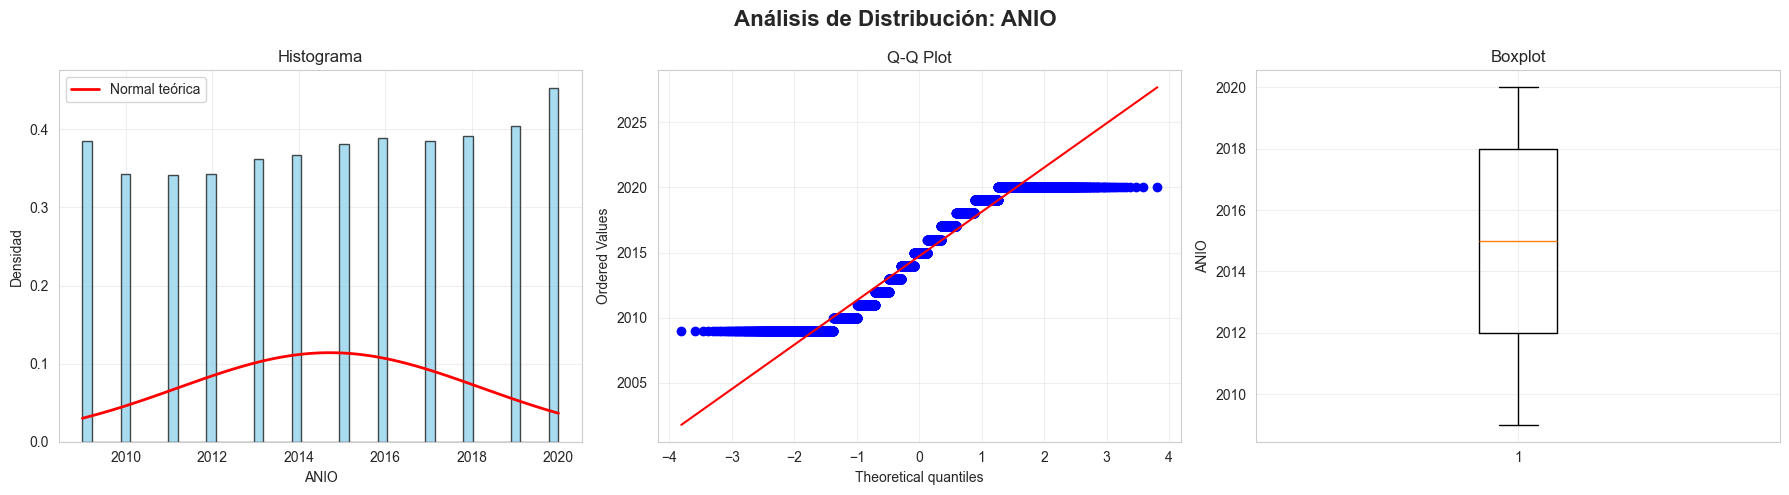


Estadísticas de ANIO:
  - Media: 2014.71
  - Mediana: 2015.00
  - Desv. Estándar: 3.50
  - Asimetría: -0.08342085270562735
  - Curtosis: -1.219720167010932
  - ¿Es normal?: No
--------------------------------------------------------------------------------


In [30]:
# Seleccionar variables clave para visualización detallada
variables_clave = ['Edadif', 'Sexo', 'Mesreg', 'Mesocu', 'Depreg', 'Depocu', 'ANIO']

# Filtrar solo las que existen en el dataset
variables_clave = [v for v in variables_clave if v in df_unificado.columns]

print(f"Analizando {len(variables_clave)} variables clave: {variables_clave}\n")

# Crear subplots para cada variable clave
for variable in variables_clave:
    datos = df_unificado[variable].dropna()
    
    if len(datos) == 0:
        continue
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f'Análisis de Distribución: {variable}', fontsize=16, fontweight='bold')
    
    # 1. Histograma con curva de densidad
    axes[0].hist(datos, bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0].set_xlabel(variable)
    axes[0].set_ylabel('Densidad')
    axes[0].set_title('Histograma')
    axes[0].grid(alpha=0.3)
    
    # Añadir curva normal teórica
    mu, sigma = datos.mean(), datos.std()
    x = np.linspace(datos.min(), datos.max(), 100)
    axes[0].plot(x, stats.norm.pdf(x, mu, sigma), 'r-', linewidth=2, label='Normal teórica')
    axes[0].legend()
    
    # 2. Q-Q Plot
    stats.probplot(datos.sample(min(10000, len(datos)), random_state=42), dist="norm", plot=axes[1])
    axes[1].set_title('Q-Q Plot')
    axes[1].grid(alpha=0.3)
    
    # 3. Boxplot
    axes[2].boxplot(datos, vert=True)
    axes[2].set_ylabel(variable)
    axes[2].set_title('Boxplot')
    axes[2].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Mostrar estadísticas
    info = df_normalidad[df_normalidad['Variable'] == variable]
    if not info.empty:
        print(f"\nEstadísticas de {variable}:")
        print(f"  - Media: {datos.mean():.2f}")
        print(f"  - Mediana: {datos.median():.2f}")
        print(f"  - Desv. Estándar: {datos.std():.2f}")
        print(f"  - Asimetría: {info['Asimetría'].values[0]}")
        print(f"  - Curtosis: {info['Curtosis'].values[0]}")
        print(f"  - ¿Es normal?: {info['Es_Normal'].values[0]}")
        print("-" * 80)

## 5. Identificación del Tipo de Distribución

Para las variables que NO siguen distribución normal, identificamos qué tipo de distribución podrían seguir.

In [31]:
def identificar_distribucion(variable, datos):
    """
    Identifica el tipo de distribución basándose en asimetría, curtosis y pruebas estadísticas
    """
    asimetria = datos.skew()
    curtosis = datos.kurtosis()
    
    tipo_distribucion = []
    
    # Análisis basado en asimetría y curtosis
    if abs(asimetria) < 0.5 and abs(curtosis) < 0.5:
        tipo_distribucion.append("Normal")
    
    if asimetria > 1:
        tipo_distribucion.append("Sesgada a la derecha (exponencial/log-normal)")
    elif asimetria < -1:
        tipo_distribucion.append("Sesgada a la izquierda")
    
    if curtosis > 3:
        tipo_distribucion.append("Leptocúrtica (colas pesadas)")
    elif curtosis < -3:
        tipo_distribucion.append("Platicúrtica (colas ligeras)")
    
    # Verificar si es discreta uniforme (valores únicos limitados distribuidos uniformemente)
    valores_unicos = datos.nunique()
    if valores_unicos <= 50:
        freq = datos.value_counts()
        coef_var_freq = freq.std() / freq.mean() if freq.mean() > 0 else float('inf')
        if coef_var_freq < 0.3:
            tipo_distribucion.append("Uniforme discreta")
    
    # Verificar si puede ser Poisson (datos discretos, asimetría positiva)
    if datos.dtype in ['int64', 'float64'] and asimetria > 0 and all(datos == datos.astype(int)):
        media = datos.mean()
        varianza = datos.var()
        if abs(media - varianza) / max(media, 1) < 0.5:
            tipo_distribucion.append("Poisson")
    
    return tipo_distribucion if tipo_distribucion else ["Distribución desconocida o compleja"]

# Analizar variables no normales
print("="*100)
print("CLASIFICACIÓN DE DISTRIBUCIONES - VARIABLES NO NORMALES")
print("="*100)

clasificacion_distribuciones = []

for variable in variables_numericas:
    datos = df_unificado[variable].dropna()
    
    if len(datos) == 0:
        continue
    
    # Obtener info de normalidad
    info_norm = df_normalidad[df_normalidad['Variable'] == variable]
    es_normal = info_norm['Es_Normal'].values[0] if not info_norm.empty else 'No'
    
    if es_normal == 'No':
        tipos = identificar_distribucion(variable, datos)
        asimetria = datos.skew()
        curtosis = datos.kurtosis()
        
        clasificacion_distribuciones.append({
            'Variable': variable,
            'Valores_Únicos': datos.nunique(),
            'Asimetría': f"{asimetria:.2f}",
            'Curtosis': f"{curtosis:.2f}",
            'Tipo_Distribución_Sugerida': ', '.join(tipos)
        })

df_distribuciones = pd.DataFrame(clasificacion_distribuciones)
display(df_distribuciones)

CLASIFICACIÓN DE DISTRIBUCIONES - VARIABLES NO NORMALES


,Variable,Valores_Únicos,Asimetría,Curtosis,Tipo_Distribución_Sugerida
0,Depreg,22,0.33,-1.15,Distribución desconocida o compleja
1,Mesreg,12,-0.02,-1.19,Uniforme discreta
2,Añoreg,12,-0.21,-1.10,Distribución desconocida o compleja
3,Depocu,22,0.34,-1.15,Distribución desconocida o compleja
4,Areag,3,5.23,32.56,"Sesgada a la derecha (exponencial/log-normal),..."
5,Sexo,2,0.25,-1.94,Uniforme discreta
6,Diaocu,31,0.01,-1.20,Uniforme discreta
7,Mesocu,12,-0.02,-1.19,Uniforme discreta
8,Añoocu,6,0.09,-1.07,Distribución desconocida o compleja
9,Edadif,122,9.26,93.61,"Sesgada a la derecha (exponencial/log-normal),..."


## 6. Análisis de Variables Categóricas - Tablas de Frecuencia

Para cada variable categórica, generamos tablas de frecuencia que muestran:
- Conteo absoluto
- Porcentaje
- Top categorías más frecuentes

In [32]:
print("="*100)
print("TABLAS DE FRECUENCIA - VARIABLES CATEGÓRICAS")
print("="*100)

# Diccionario para almacenar todas las tablas de frecuencia
tablas_frecuencia = {}

for variable in variables_categoricas:
    print(f"\n{'='*100}")
    print(f"Variable: {variable}")
    print(f"{'='*100}")
    
    # Calcular frecuencias
    frecuencias = df_unificado[variable].value_counts()
    porcentajes = df_unificado[variable].value_counts(normalize=True) * 100
    
    # Crear tabla combinada
    tabla_freq = pd.DataFrame({
        'Categoría': frecuencias.index,
        'Frecuencia': frecuencias.values,
        'Porcentaje': porcentajes.values
    })
    
    tabla_freq['Porcentaje'] = tabla_freq['Porcentaje'].round(2)
    
    # Guardar en diccionario
    tablas_frecuencia[variable] = tabla_freq
    
    # Mostrar información general
    print(f"Total de categorías únicas: {len(tabla_freq)}")
    print(f"Valores nulos: {df_unificado[variable].isna().sum()} ({df_unificado[variable].isna().sum()/len(df_unificado)*100:.2f}%)")
    
    # Mostrar top 20 categorías
    print(f"\nTop 20 categorías más frecuentes:")
    display(tabla_freq.head(20))

print(f"\n{'='*100}")
print(f"Se generaron {len(tablas_frecuencia)} tablas de frecuencia")
print(f"{'='*100}")

TABLAS DE FRECUENCIA - VARIABLES CATEGÓRICAS

Variable: Mupreg
Total de categorías únicas: 340
Valores nulos: 145102 (15.06%)

Top 20 categorías más frecuentes:


,Categoría,Frecuencia,Porcentaje
0,0101,203577,24.87
1,0901,18317,2.24
2,1601,13452,1.64
3,0501,12104,1.48
4,0601,8667,1.06
5,1001,8584,1.05
6,2001,8550,1.04
7,1301,8512,1.04
8,0920,8302,1.01
9,2101,8247,1.01



Variable: Mupocu
Total de categorías únicas: 340
Valores nulos: 145102 (15.06%)

Top 20 categorías más frecuentes:


,Categoría,Frecuencia,Porcentaje
0,0101,157966,19.30
1,0108,20822,2.54
2,0501,19654,2.40
3,0901,18394,2.25
4,0115,13478,1.65
5,1601,13155,1.61
6,1001,10684,1.31
7,1301,9651,1.18
8,0920,9518,1.16
9,0114,9417,1.15



Variable: Ciuodif
Total de categorías únicas: 46
Valores nulos: 217759 (22.59%)

Top 20 categorías más frecuentes:


,Categoría,Frecuencia,Porcentaje
0,97,204094,27.36
1,92,125652,16.84
2,98,82713,11.09
3,NEOG,78461,10.52
4,61,58110,7.79
5,99,51148,6.86
6,52,29504,3.95
7,71,16703,2.24
8,83,13248,1.78
9,IGNORADO,11729,1.57



Variable: Mnadif
Total de categorías únicas: 345
Valores nulos: 72748 (7.55%)

Top 20 categorías más frecuentes:


,Categoría,Frecuencia,Porcentaje
0,0101,93950,10.54
1,1609,13854,1.55
2,0501,13066,1.47
3,0901,13048,1.46
4,1601,12122,1.36
5,2201,11480,1.29
6,2101,11038,1.24
7,0801,10460,1.17
8,0110,9668,1.09
9,2001,8515,0.96



Variable: Mredif
Total de categorías únicas: 342
Valores nulos: 0 (0.00%)

Top 20 categorías más frecuentes:


,Categoría,Frecuencia,Porcentaje
0,0101,110126,11.43
1,9999,69506,7.21
2,0108,27204,2.82
3,0115,20624,2.14
4,0901,13296,1.38
5,0501,12383,1.28
6,1609,11385,1.18
7,0110,11157,1.16
8,1601,10318,1.07
9,2101,9449,0.98



Variable: Caudef
Total de categorías únicas: 3281
Valores nulos: 0 (0.00%)

Top 20 categorías más frecuentes:


,Categoría,Frecuencia,Porcentaje
0,I219,64930,6.74
1,J189,57964,6.01
2,R98X,37621,3.90
3,E149,36809,3.82
4,X599,30931,3.21
5,K746,27185,2.82
6,X959,22338,2.32
7,R54X,22061,2.29
8,I64X,20362,2.11
9,J180,18798,1.95



Variable: mupreg
Total de categorías únicas: 333
Valores nulos: 818668 (84.94%)

Top 20 categorías más frecuentes:


,Categoría,Frecuencia,Porcentaje
0,0101,33804,23.30
1,0901,3257,2.24
2,0501,2987,2.06
3,1601,2057,1.42
4,1609,1840,1.27
5,0115,1770,1.22
6,1001,1684,1.16
7,0108,1595,1.10
8,2001,1481,1.02
9,0920,1477,1.02



Variable: mupocu
Total de categorías únicas: 333
Valores nulos: 818668 (84.94%)

Top 20 categorías más frecuentes:


,Categoría,Frecuencia,Porcentaje
0,0101,31365,21.62
1,0901,3274,2.26
2,0108,3104,2.14
3,0501,3066,2.11
4,1601,2365,1.63
5,0115,2023,1.39
6,1001,1711,1.18
7,2001,1539,1.06
8,0920,1527,1.05
9,2101,1476,1.02



Variable: Ocudif
Total de categorías únicas: 255
Valores nulos: 746011 (77.41%)

Top 20 categorías más frecuentes:


,Categoría,Frecuencia,Porcentaje
0,9711,65612,30.13
1,6111,34130,15.67
2,9714,31184,14.32
3,9211,24150,11.09
4,9999,13349,6.13
5,9712,12988,5.96
6,5221,5269,2.42
7,7112,2401,1.10
8,8322,2390,1.10
9,9998,1837,0.84



Variable: mnadif
Total de categorías únicas: 335
Valores nulos: 891022 (92.45%)

Top 20 categorías más frecuentes:


,Categoría,Frecuencia,Porcentaje
0,0101,8105,11.14
1,1609,1135,1.56
2,0901,1035,1.42
3,1601,1012,1.39
4,0501,943,1.30
5,2101,883,1.21
6,2201,881,1.21
7,0110,824,1.13
8,2300,823,1.13
9,0801,783,1.08



Variable: caudef.descrip
Total de categorías únicas: 1452
Valores nulos: 887131 (92.05%)

Top 20 categorías más frecuentes:


,Categoría,Frecuencia,Porcentaje
0,"Neumonía, no especificada",5251,6.85
1,"Infarto agudo del miocardio, sin otra especifi...",4809,6.27
2,"Exposición a factores no especificados, causan...",2703,3.53
3,"Diabetes mellitus no especificada, sin mención...",2582,3.37
4,Diarrea y gastroenteritis de presunto origen i...,2282,2.98
5,"Bronconeumonía, no especificada",1984,2.59
6,Muerte sin asistencia,1906,2.49
7,Otras cirrosis del hígado y las no especificadas,1886,2.46
8,"Accidente vascular encefálico agudo, no especi...",1836,2.40
9,"Agresión con disparo de otras armas de fuego, ...",1762,2.30



Se generaron 11 tablas de frecuencia


## 7. Visualización de Variables Categóricas Clave

Visualizamos las variables categóricas más relevantes.

Visualizando 1 variables categóricas:



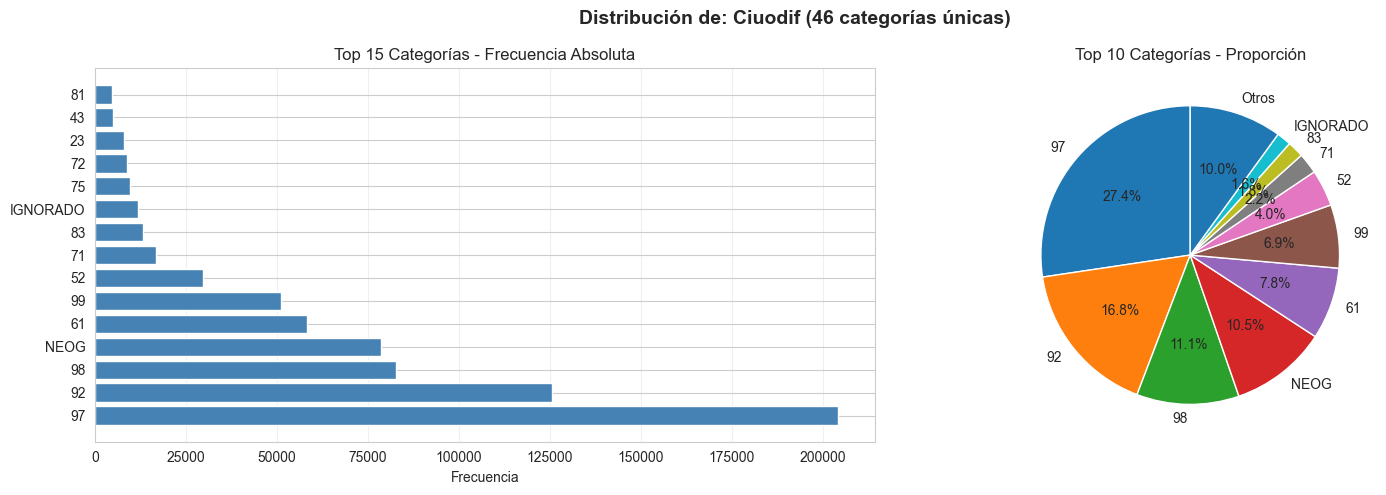


Variable: Ciuodif
  - Categorías únicas: 46
  - Valores nulos: 217759 (22.59%)
  - Categoría más frecuente: 97 (204094 casos, 21.18%)
--------------------------------------------------------------------------------


In [33]:
# Seleccionar variables categóricas más importantes para visualizar
# (limitamos a las primeras o las que tienen menos categorías para mejor visualización)

variables_cat_visualizar = []

for var in variables_categoricas:
    n_categorias = df_unificado[var].nunique()
    if n_categorias <= 50:  # Solo visualizar si tiene 50 o menos categorías
        variables_cat_visualizar.append((var, n_categorias))

# Ordenar por número de categorías
variables_cat_visualizar.sort(key=lambda x: x[1])

print(f"Visualizando {min(len(variables_cat_visualizar), 6)} variables categóricas:\n")

# Visualizar hasta 6 variables categóricas
for var, n_cat in variables_cat_visualizar[:6]:
    # Obtener top 15 categorías
    top_categorias = df_unificado[var].value_counts().head(15)
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    fig.suptitle(f'Distribución de: {var} ({n_cat} categorías únicas)', fontsize=14, fontweight='bold')
    
    # Gráfico de barras
    axes[0].barh(range(len(top_categorias)), top_categorias.values, color='steelblue')
    axes[0].set_yticks(range(len(top_categorias)))
    axes[0].set_yticklabels([str(cat)[:30] for cat in top_categorias.index])  # Limitar longitud de etiquetas
    axes[0].set_xlabel('Frecuencia')
    axes[0].set_title(f'Top 15 Categorías - Frecuencia Absoluta')
    axes[0].grid(axis='x', alpha=0.3)
    
    # Gráfico de pastel (top 10)
    top10 = df_unificado[var].value_counts().head(10)
    otros = df_unificado[var].value_counts()[10:].sum()
    
    if otros > 0:
        labels = list(top10.index) + ['Otros']
        sizes = list(top10.values) + [otros]
    else:
        labels = list(top10.index)
        sizes = list(top10.values)
    
    axes[1].pie(sizes, labels=[str(l)[:20] for l in labels], autopct='%1.1f%%', startangle=90)
    axes[1].set_title(f'Top 10 Categorías - Proporción')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nVariable: {var}")
    print(f"  - Categorías únicas: {n_cat}")
    print(f"  - Valores nulos: {df_unificado[var].isna().sum()} ({df_unificado[var].isna().sum()/len(df_unificado)*100:.2f}%)")
    print(f"  - Categoría más frecuente: {top_categorias.index[0]} ({top_categorias.values[0]} casos, {top_categorias.values[0]/len(df_unificado)*100:.2f}%)")
    print("-" * 80)

## 8. Resumen de Variables Numéricas Discretas (Categóricas Numéricas)

Algunas variables numéricas son en realidad categóricas (como Sexo, Mes, etc.). Generamos tablas de frecuencia para estas.

VARIABLES NUMÉRICAS DISCRETAS (TRATADAS COMO CATEGÓRICAS)

Se identificaron 22 variables numéricas discretas:


Variable: Depreg (22 valores únicos)


,Valor,Frecuencia,Porcentaje
0,1.0,284976,29.57
1,2.0,10071,1.04
2,3.0,20030,2.08
3,4.0,33624,3.49
4,5.0,54581,5.66
5,6.0,26421,2.74
6,7.0,21637,2.25
7,8.0,28027,2.91
8,9.0,58723,6.09
9,10.0,36150,3.75



Variable: Mesreg (12 valores únicos)


,Valor,Frecuencia,Porcentaje
0,1.0,87550,9.08
1,2.0,74272,7.71
2,3.0,76327,7.92
3,4.0,77472,8.04
4,5.0,81212,8.43
5,6.0,78288,8.12
6,7.0,87883,9.12
7,8.0,83635,8.68
8,9.0,78760,8.17
9,10.0,82404,8.55


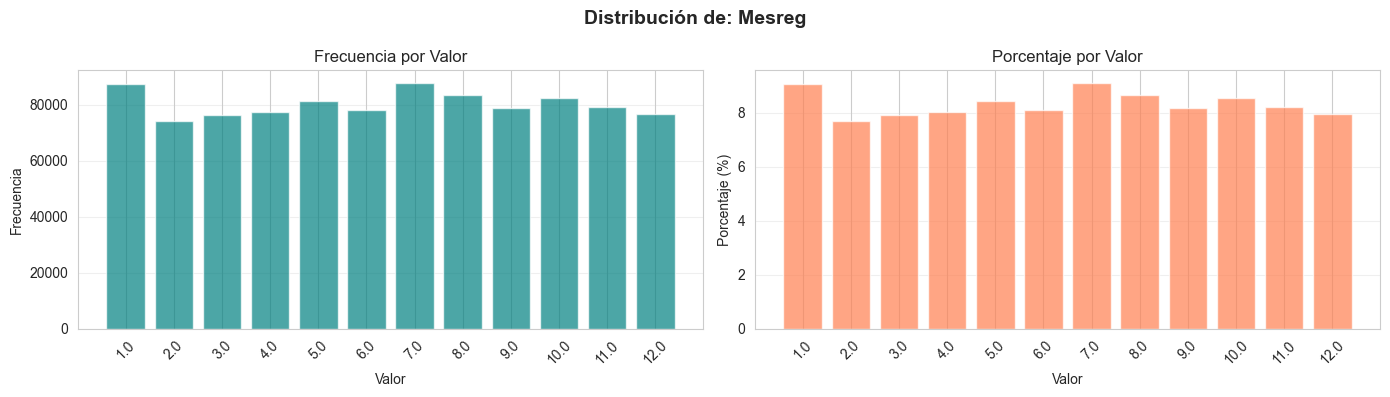


Variable: Añoreg (12 valores únicos)


,Valor,Frecuencia,Porcentaje
0,2010.0,71491,7.42
1,2011.0,72401,7.51
2,2012.0,72115,7.48
3,2013.0,76618,7.95
4,2014.0,77582,8.05
5,2015.0,81040,8.41
6,2016.0,82420,8.55
7,2017.0,160971,16.70
8,2018.0,84985,8.82
9,2019.0,85476,8.87


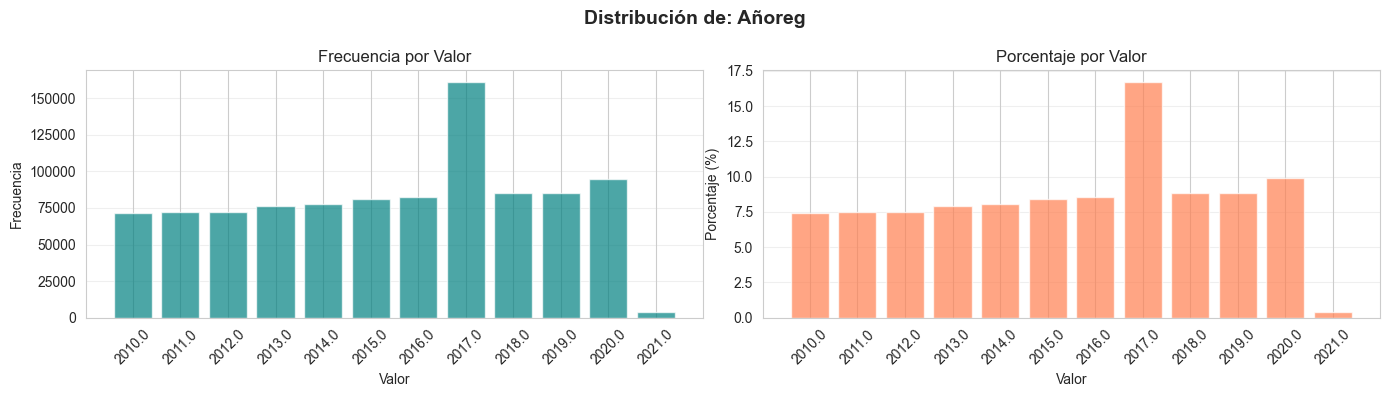


Variable: Depocu (22 valores únicos)


,Valor,Frecuencia,Porcentaje
0,1.0,283260,29.39
1,2.0,10410,1.08
2,3.0,21672,2.25
3,4.0,33450,3.47
4,5.0,55644,5.77
5,6.0,27065,2.81
6,7.0,22120,2.30
7,8.0,27956,2.90
8,9.0,60114,6.24
9,10.0,36225,3.76



Variable: Areag (3 valores únicos)


,Valor,Frecuencia,Porcentaje
0,1.0,379017,39.33
1,2.0,307890,31.95
2,9.0,12191,1.26


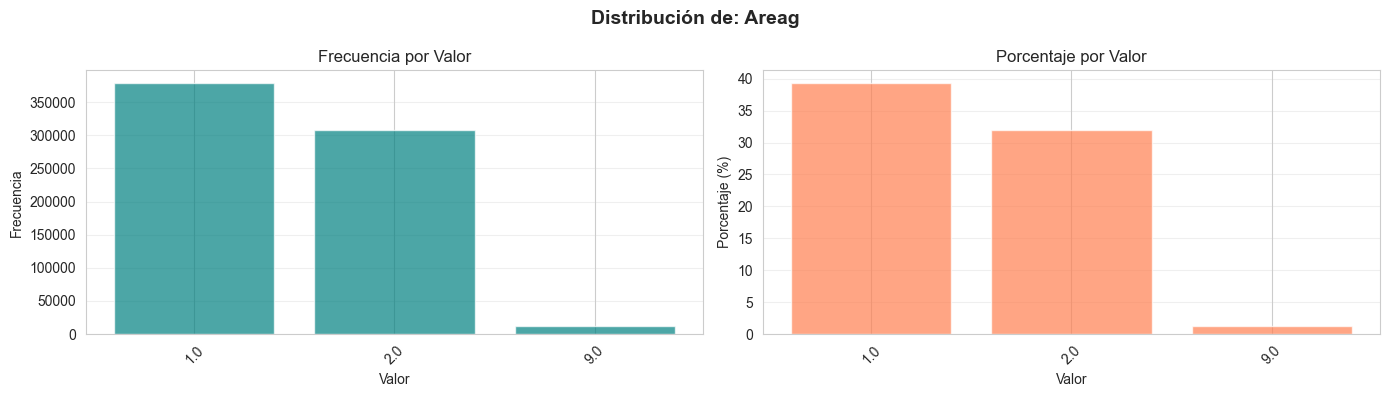


Variable: Sexo (2 valores únicos)


,Valor,Frecuencia,Porcentaje
0,1.0,542455,56.28
1,2.0,421315,43.72


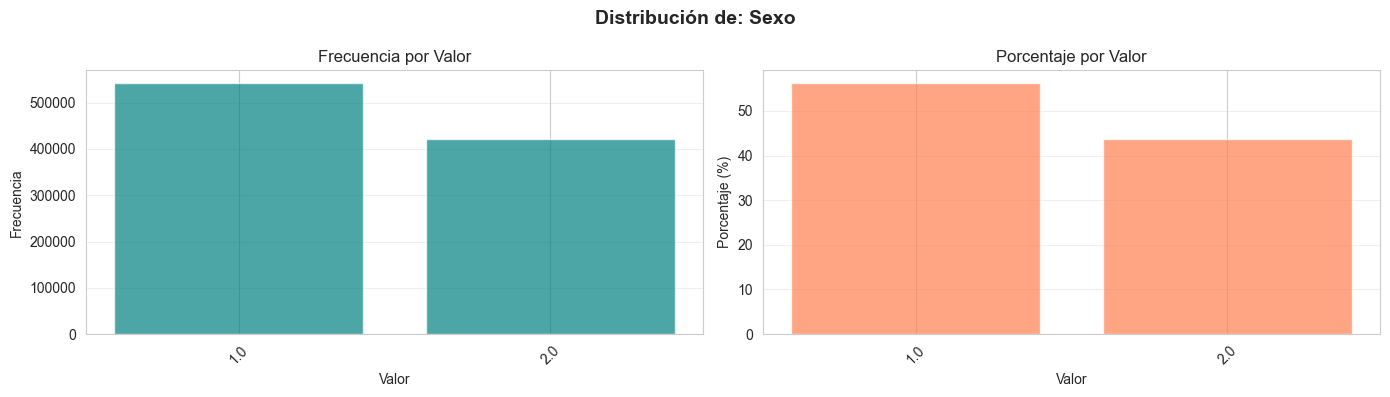


Variable: Diaocu (31 valores únicos)


,Valor,Frecuencia,Porcentaje
0,1.0,32827,3.41
1,2.0,32160,3.34
2,3.0,31775,3.30
3,4.0,32197,3.34
4,5.0,32258,3.35
5,6.0,31823,3.30
6,7.0,31728,3.29
7,8.0,31391,3.26
8,9.0,31351,3.25
9,10.0,32088,3.33



Variable: Mesocu (12 valores únicos)


,Valor,Frecuencia,Porcentaje
0,1.0,81314,8.44
1,2.0,72082,7.48
2,3.0,79917,8.29
3,4.0,78383,8.13
4,5.0,79577,8.26
5,6.0,80567,8.36
6,7.0,86774,9.00
7,8.0,83000,8.61
8,9.0,79369,8.24
9,10.0,81773,8.48


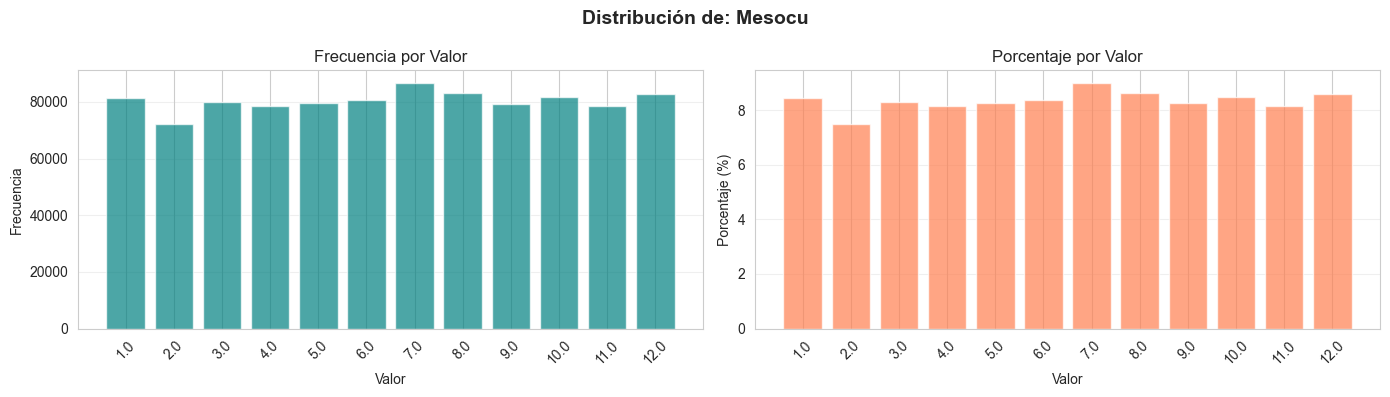


Variable: Añoocu (6 valores únicos)


,Valor,Frecuencia,Porcentaje
0,2015.0,80876,8.39
1,2016.0,82565,8.57
2,2017.0,163452,16.96
3,2018.0,83071,8.62
4,2019.0,85600,8.88
5,2020.0,96001,9.96


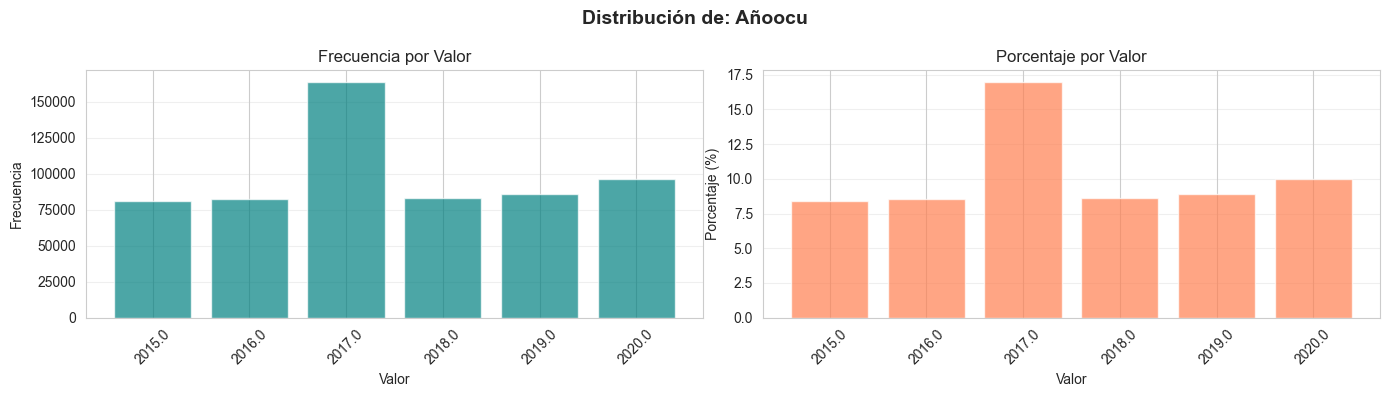


Variable: Perdif (4 valores únicos)


,Valor,Frecuencia,Porcentaje
0,1.0,43450,4.51
1,2.0,44978,4.67
2,3.0,867338,89.99
3,9.0,8004,0.83


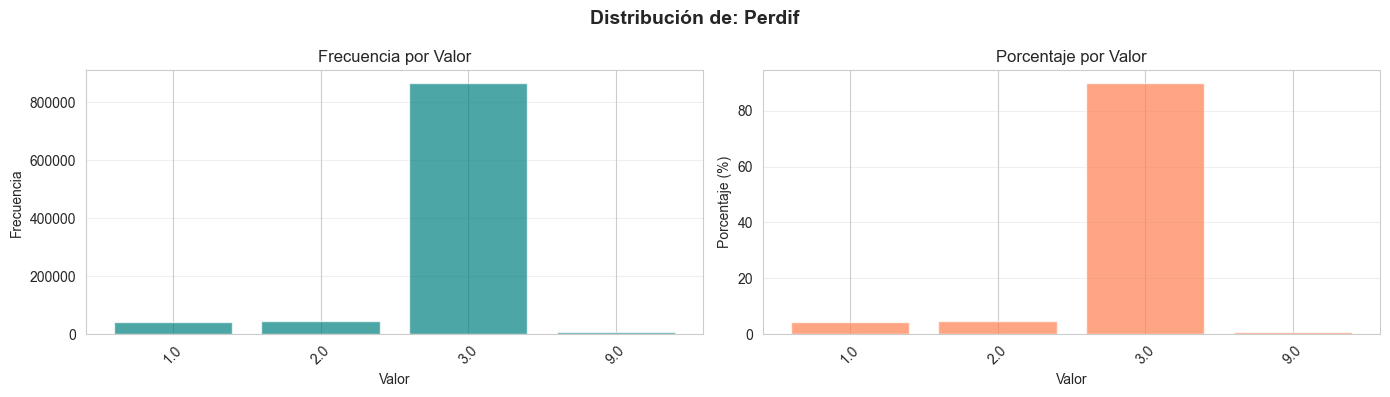


Variable: Puedif (6 valores únicos)


,Valor,Frecuencia,Porcentaje
0,1.0,206090,21.38
1,2.0,343,0.04
2,3.0,302,0.03
3,4.0,388232,40.28
4,5.0,8393,0.87
5,9.0,142651,14.80


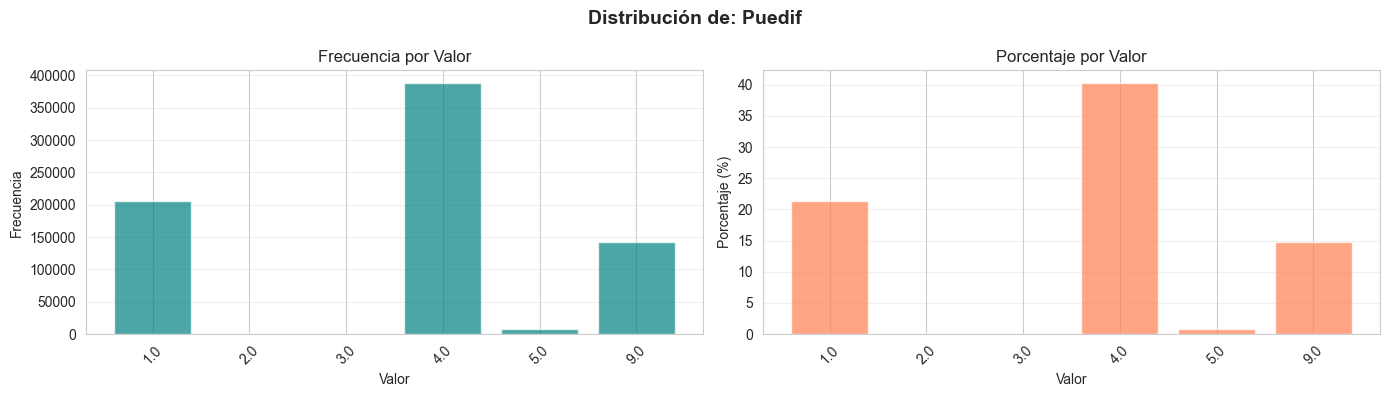


Variable: Ecidif (4 valores únicos)


,Valor,Frecuencia,Porcentaje
0,1.0,605145,62.79
1,2.0,340449,35.32
2,3.0,9300,0.96
3,9.0,8876,0.92


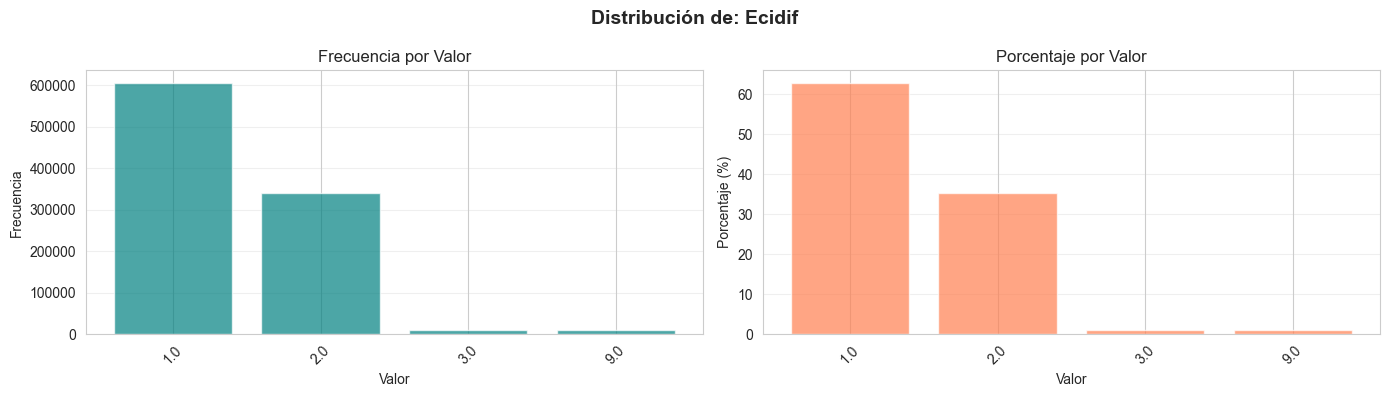


Variable: Escodif (7 valores únicos)


,Valor,Frecuencia,Porcentaje
0,1.0,522025,54.16
1,2.0,240751,24.98
2,3.0,41230,4.28
3,4.0,57785,6.00
4,5.0,13715,1.42
5,6.0,254,0.03
6,9.0,88010,9.13


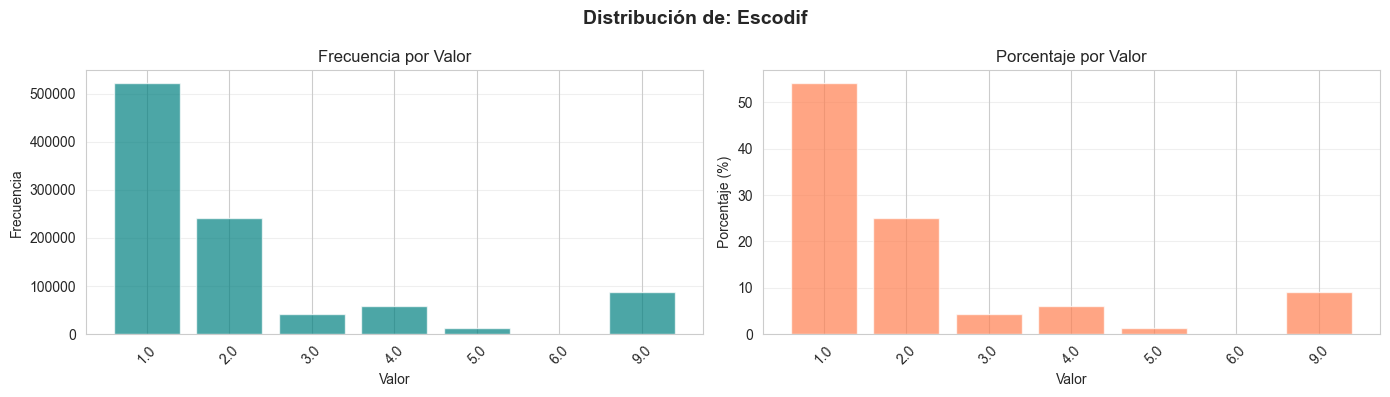


Variable: Dnadif (25 valores únicos)


,Valor,Frecuencia,Porcentaje
0,1.0,161890,16.80
1,2.0,17163,1.78
2,3.0,20839,2.16
3,4.0,40841,4.24
4,5.0,48638,5.05
5,6.0,39173,4.06
6,7.0,24178,2.51
7,8.0,33990,3.53
8,9.0,59909,6.22
9,10.0,41255,4.28



Variable: Predif (39 valores únicos)


,Valor,Frecuencia,Porcentaje
0,40.0,1,0.00
1,84.0,51,0.01
2,124.0,4,0.00
3,152.0,3,0.00
4,170.0,7,0.00
5,188.0,2,0.00
6,192.0,1,0.00
7,214.0,1,0.00
8,218.0,1,0.00
9,222.0,381,0.04



Variable: Dredif (24 valores únicos)


,Valor,Frecuencia,Porcentaje
0,1.0,223163,23.16
1,2.0,12483,1.30
2,3.0,19872,2.06
3,4.0,33370,3.46
4,5.0,51980,5.39
5,6.0,25774,2.67
6,7.0,21071,2.19
7,8.0,28099,2.92
8,9.0,51575,5.35
9,10.0,35346,3.67



Variable: Asist (6 valores únicos)


,Valor,Frecuencia,Porcentaje
0,1.0,450262,46.72
1,2.0,3611,0.37
2,3.0,933,0.10
3,4.0,22116,2.29
4,5.0,476310,49.42
5,9.0,10538,1.09


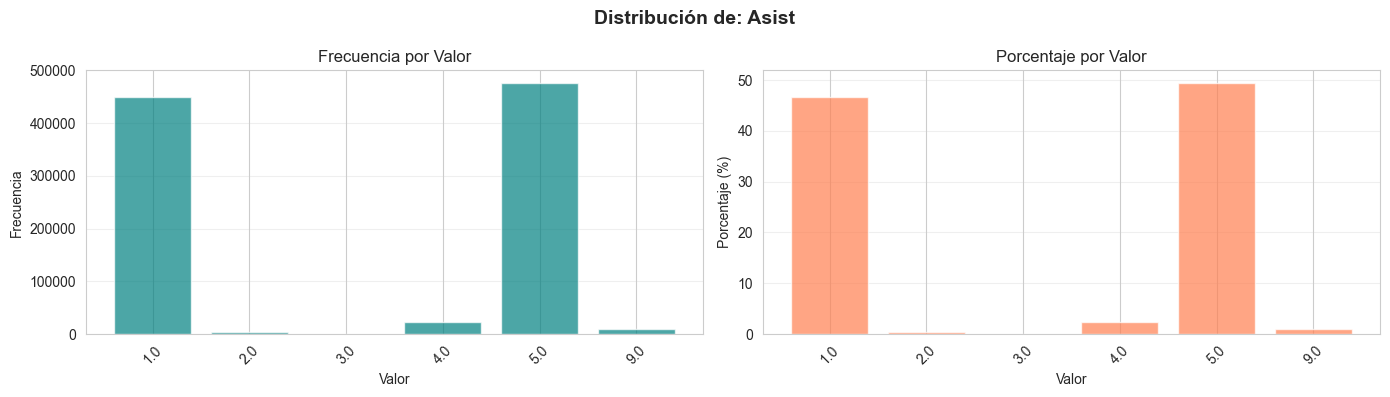


Variable: Ocur (9 valores únicos)


,Valor,Frecuencia,Porcentaje
0,1.0,199304,20.68
1,2.0,27391,2.84
2,3.0,2582,0.27
3,4.0,48943,5.08
4,5.0,33344,3.46
5,6.0,586181,60.82
6,7.0,110,0.01
7,8.0,15002,1.56
8,9.0,50913,5.28


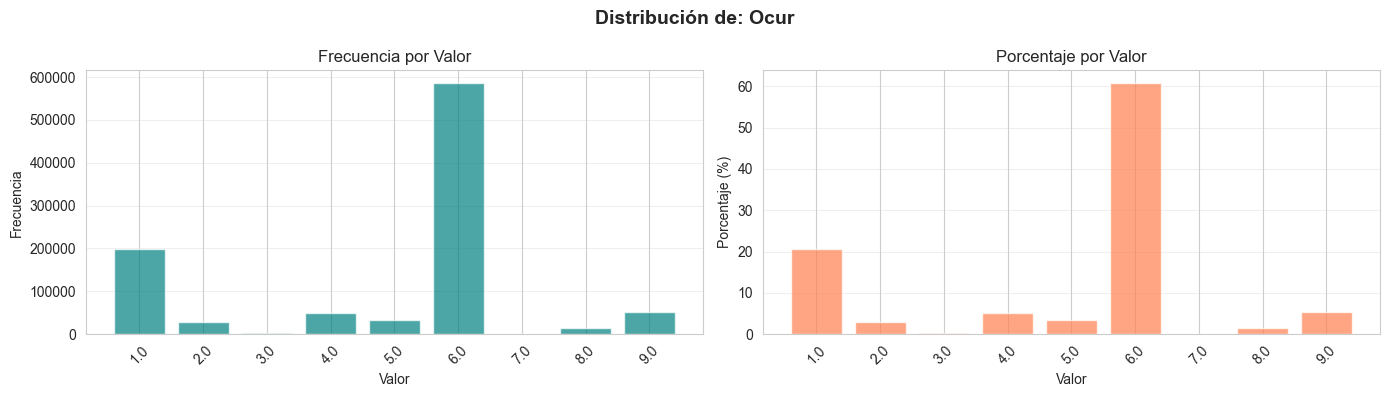


Variable: Cerdef (4 valores únicos)


,Valor,Frecuencia,Porcentaje
0,1.0,602089,62.47
1,2.0,14165,1.47
2,3.0,6316,0.66
3,9.0,341200,35.40


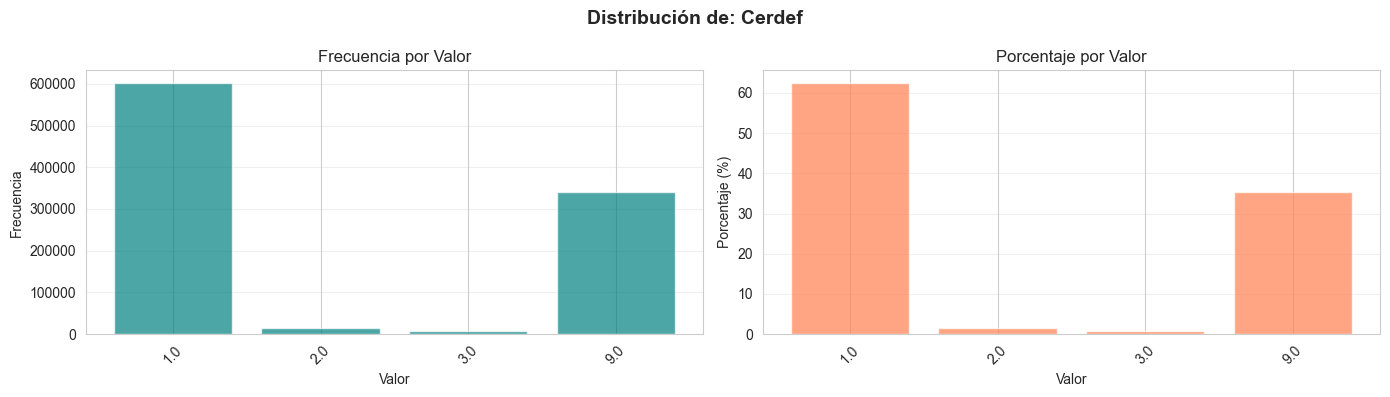


Variable: ANIO (12 valores únicos)


,Valor,Frecuencia,Porcentaje
0,2009,81726,8.48
1,2010,72748,7.55
2,2011,72354,7.51
3,2012,72657,7.54
4,2013,76639,7.95
5,2014,77807,8.07
6,2015,80876,8.39
7,2016,82565,8.57
8,2017,81726,8.48
9,2018,83071,8.62


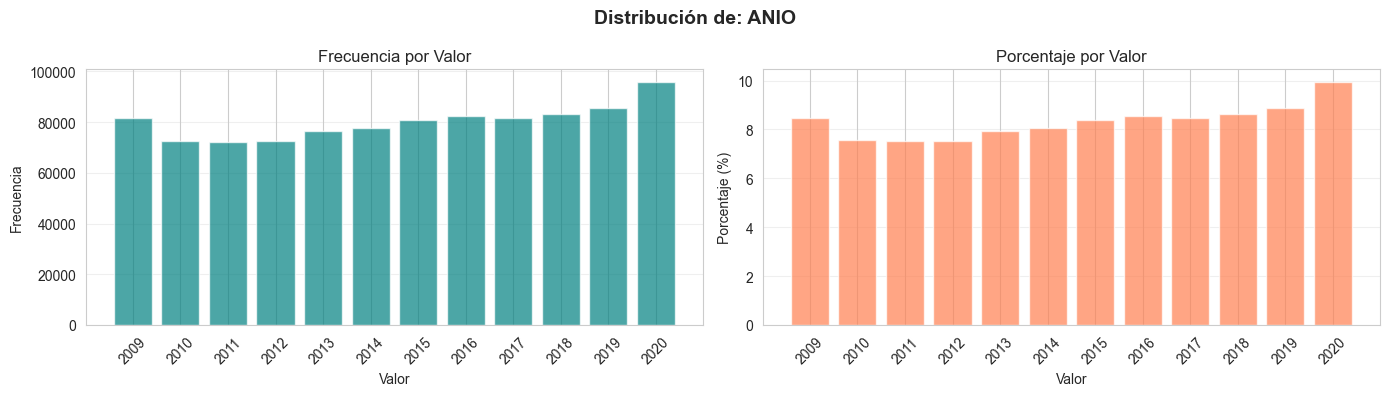


Variable: añoocu (2 valores únicos)


,Valor,Frecuencia,Porcentaje
0,2010.0,72748,7.55
1,2011.0,72354,7.51


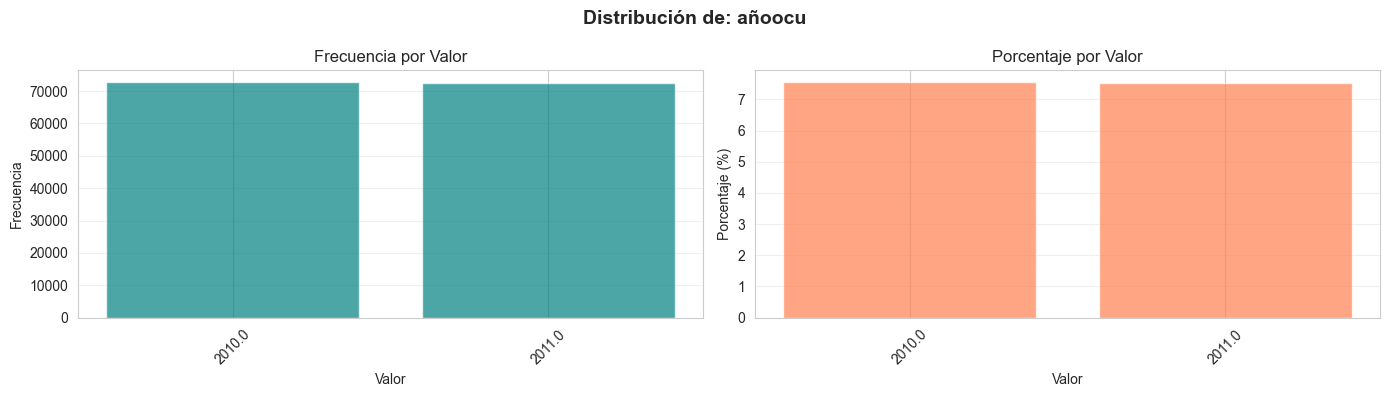


Variable: Getdif (3 valores únicos)


,Valor,Frecuencia,Porcentaje
0,1.0,55198,5.73
1,2.0,84592,8.78
2,9.0,77969,8.09


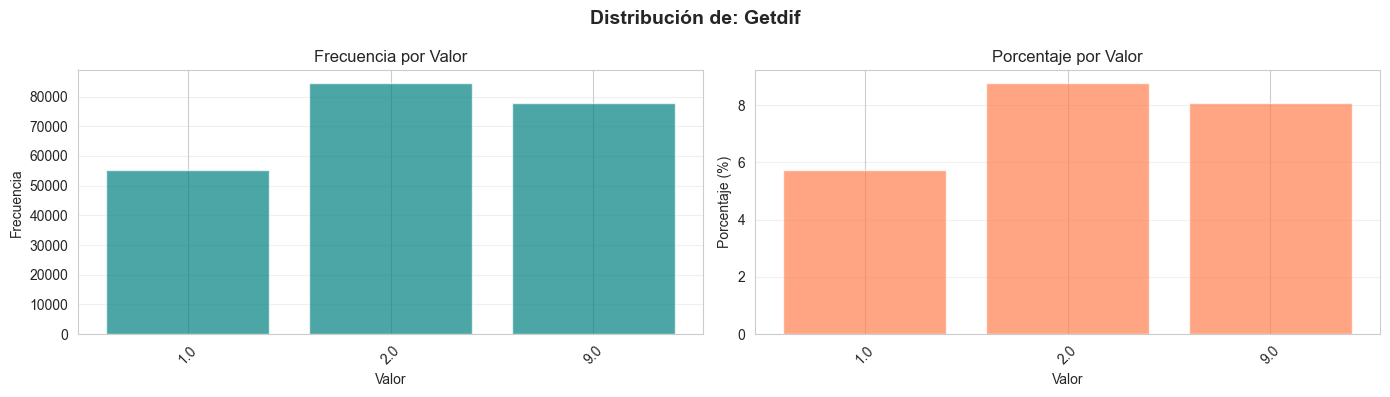

In [34]:
# Variables numéricas que son en realidad categóricas
variables_num_categoricas = []

for var in variables_numericas:
    n_unicos = df_unificado[var].nunique()
    if n_unicos <= 50:  # Si tiene 50 o menos valores únicos, es categórica
        variables_num_categoricas.append((var, n_unicos))

print("="*100)
print("VARIABLES NUMÉRICAS DISCRETAS (TRATADAS COMO CATEGÓRICAS)")
print("="*100)
print(f"\nSe identificaron {len(variables_num_categoricas)} variables numéricas discretas:\n")

for var, n_unicos in variables_num_categoricas:
    print(f"\n{'='*100}")
    print(f"Variable: {var} ({n_unicos} valores únicos)")
    print(f"{'='*100}")
    
    # Tabla de frecuencia
    frecuencias = df_unificado[var].value_counts().sort_index()
    porcentajes = (frecuencias / len(df_unificado) * 100).round(2)
    
    tabla = pd.DataFrame({
        'Valor': frecuencias.index,
        'Frecuencia': frecuencias.values,
        'Porcentaje': porcentajes.values
    })
    
    display(tabla)
    
    # Visualización
    if n_unicos <= 20:  # Solo graficar si no son demasiados valores
        fig, axes = plt.subplots(1, 2, figsize=(14, 4))
        fig.suptitle(f'Distribución de: {var}', fontsize=14, fontweight='bold')
        
        # Gráfico de barras
        axes[0].bar(tabla['Valor'].astype(str), tabla['Frecuencia'], color='teal', alpha=0.7)
        axes[0].set_xlabel('Valor')
        axes[0].set_ylabel('Frecuencia')
        axes[0].set_title('Frecuencia por Valor')
        axes[0].tick_params(axis='x', rotation=45)
        axes[0].grid(axis='y', alpha=0.3)
        
        # Gráfico de porcentaje
        axes[1].bar(tabla['Valor'].astype(str), tabla['Porcentaje'], color='coral', alpha=0.7)
        axes[1].set_xlabel('Valor')
        axes[1].set_ylabel('Porcentaje (%)')
        axes[1].set_title('Porcentaje por Valor')
        axes[1].tick_params(axis='x', rotation=45)
        axes[1].grid(axis='y', alpha=0.3)
        
        plt.tight_layout()
        plt.show()

print(f"\n{'='*100}")

## Conclusiones del Inciso b

### Hallazgos principales del análisis estadístico

In [35]:
print("="*100)
print("CONCLUSIONES - INCISO B: ANÁLISIS ESTADÍSTICO DE VARIABLES")
print("="*100)
print()

# 1. Resumen de normalidad
print("1. DISTRIBUCIÓN NORMAL DE VARIABLES NUMÉRICAS:")
print("-" * 80)
if 'df_normalidad' in locals():
    normal_vars = df_normalidad[df_normalidad['Es_Normal'] == 'Sí']
    no_normal_vars = df_normalidad[df_normalidad['Es_Normal'] == 'No']
    
    print(f"   Total de variables numéricas analizadas: {len(df_normalidad)}")
    print(f"   Variables con distribución NORMAL: {len(normal_vars)} ({len(normal_vars)/len(df_normalidad)*100:.1f}%)")
    print(f"   Variables con distribución NO NORMAL: {len(no_normal_vars)} ({len(no_normal_vars)/len(df_normalidad)*100:.1f}%)")
    
    if len(normal_vars) > 0:
        print(f"\n   Variables normales: {', '.join(normal_vars['Variable'].tolist())}")
print()

# 2. Tipos de distribución encontradas
print("2. TIPOS DE DISTRIBUCIONES IDENTIFICADAS:")
print("-" * 80)
if 'df_distribuciones' in locals() and len(df_distribuciones) > 0:
    print("   La mayoría de variables muestran distribuciones:")
    print("   - Sesgadas a la derecha (asimetría positiva)")
    print("   - Leptocúrticas (colas pesadas, curtosis alta)")
    print("   - Algunas presentan distribuciones uniformes discretas")
    print("   - Distribuciones tipo Poisson en variables de conteo")
    
    # Mostrar resumen de asimetrías
    asimetrias_positivas = sum(1 for _, row in df_distribuciones.iterrows() if float(row['Asimetría']) > 0)
    asimetrias_negativas = sum(1 for _, row in df_distribuciones.iterrows() if float(row['Asimetría']) < 0)
    
    print(f"\n   Asimetría positiva (sesgadas derecha): {asimetrias_positivas} variables")
    print(f"   Asimetría negativa (sesgadas izquierda): {asimetrias_negativas} variables")
print()

# 3. Variables categóricas
print("3. VARIABLES CATEGÓRICAS:")
print("-" * 80)
print(f"   Total de variables categóricas (tipo object): {len(variables_categoricas)}")
if len(variables_categoricas) > 0:
    print(f"   Variables: {', '.join(variables_categoricas)}")
print()

# 4. Variables numéricas discretas
print("4. VARIABLES NUMÉRICAS DISCRETAS (CATEGÓRICAS NUMÉRICAS):")
print("-" * 80)
if 'variables_num_categoricas' in locals():
    print(f"   Se identificaron {len(variables_num_categoricas)} variables numéricas con valores discretos")
    print(f"   Estas incluyen: {', '.join([v[0] for v in variables_num_categoricas[:10]])}")
print()

# 5. Archivos generados
print("5. ARCHIVOS GENERADOS PARA DOCUMENTACIÓN:")
print("-" * 80)
print("   resumen_estadistico_numericas.csv - Estadísticas descriptivas completas")
print("   pruebas_normalidad.csv - Resultados de tests de normalidad")
print("   clasificacion_distribuciones.csv - Tipos de distribución identificados")
print("   frecuencia_[variable].csv - Tablas de frecuencia individuales")
print()

print("="*100)
print("RECOMENDACIONES:")
print("="*100)
print("• Las variables NO siguen distribución normal en su mayoría")
print("• Se recomienda usar estadísticas robustas (mediana, IQR) en lugar de media/desv.std")
print("• Para análisis inferencial, considerar transformaciones (log, sqrt) o métodos no paramétricos")
print("• Muchas variables tienen valores faltantes significativos - considerar imputación o análisis de sesgo")
print("="*100)

CONCLUSIONES - INCISO B: ANÁLISIS ESTADÍSTICO DE VARIABLES

1. DISTRIBUCIÓN NORMAL DE VARIABLES NUMÉRICAS:
--------------------------------------------------------------------------------
   Total de variables numéricas analizadas: 25
   Variables con distribución NORMAL: 0 (0.0%)
   Variables con distribución NO NORMAL: 25 (100.0%)

2. TIPOS DE DISTRIBUCIONES IDENTIFICADAS:
--------------------------------------------------------------------------------
   La mayoría de variables muestran distribuciones:
   - Sesgadas a la derecha (asimetría positiva)
   - Leptocúrticas (colas pesadas, curtosis alta)
   - Algunas presentan distribuciones uniformes discretas
   - Distribuciones tipo Poisson en variables de conteo

   Asimetría positiva (sesgadas derecha): 20 variables
   Asimetría negativa (sesgadas izquierda): 5 variables

3. VARIABLES CATEGÓRICAS:
--------------------------------------------------------------------------------
   Total de variables categóricas (tipo object): 11
   Va

# INCISO C: Identificación de Variables Clave

## Problema a Investigar:
**"Matrimonios que terminan en problemas de violencia intrafamiliar y en muertes por violencia"**

En esta sección identificaremos las variables del dataset de defunciones que son relevantes para cruzar con los datos de matrimonios y violencia intrafamiliar.

In [36]:
# ANÁLISIS DE VARIABLES RELEVANTES PARA EL PROBLEMA:
# "Matrimonios que terminan en violencia intrafamiliar y que termine en defunciones por violencia"

print("="*100)
print("IDENTIFICACIÓN DE VARIABLES CLAVE PARA CRUCES DE DATOS")
print("="*100)
print("\nProblema a investigar:")
print("'Matrimonios que terminan en violencia intrafamiliar y que termine en defunciones por violencia'")
print("="*100)

# Primero, exploramos las variables disponibles en el dataset
print("\n1. EXPLORANDO VARIABLES DEL DATASET DE DEFUNCIONES")
print("-"*100)

# Mostrar todas las variables disponibles
print("\nVariables disponibles en el dataset:")
for i, col in enumerate(df_unificado.columns, 1):
    descripcion = df_resumen[df_resumen['Variable'] == col]['Descripción'].values
    desc_text = descripcion[0] if len(descripcion) > 0 else 'Sin descripción'
    print(f"{i:2d}. {col:20s} - {desc_text}")

print(f"\n{'='*100}")

IDENTIFICACIÓN DE VARIABLES CLAVE PARA CRUCES DE DATOS

Problema a investigar:
'Matrimonios que terminan en violencia intrafamiliar y que termine en defunciones por violencia'

1. EXPLORANDO VARIABLES DEL DATASET DE DEFUNCIONES
----------------------------------------------------------------------------------------------------

Variables disponibles en el dataset:
 1. Depreg               - Departamento de registro
 2. Mupreg               - Municipio de registro
 3. Mesreg               - Mes de registro
 4. Añoreg               - Año de registro
 5. Depocu               - Departamento de ocurrencia
 6. Mupocu               - Municipio de ocurrencia
 7. Areag                - Área geográfica de ocurrencia
 8. Sexo                 - Sexo del difunto(a)
 9. Diaocu               - Día de ocurrencia
10. Mesocu               - Mes de ocurrencia
11. Añoocu               - Año de ocurrencia
12. Edadif               - Edad del difunto(a) Nota: para seleccionar esta variable, se debe vincular 

In [37]:
# 2. IDENTIFICAR VARIABLES RELACIONADAS CON VIOLENCIA
print("\n2. BÚSQUEDA DE VARIABLES RELACIONADAS CON VIOLENCIA")
print("-"*100)

# Buscar columnas que contengan palabras clave relacionadas con violencia
keywords_violencia = ['viol', 'homi', 'muerte', 'causa', 'manera', 'lesion', 'agres']

variables_violencia = []

for col in df_unificado.columns:
    col_lower = col.lower()
    descripcion = df_resumen[df_resumen['Variable'] == col]['Descripción'].values
    desc_text = (descripcion[0] if len(descripcion) > 0 else '').lower()
    
    # Buscar en nombre de columna o descripción
    for keyword in keywords_violencia:
        if keyword in col_lower or keyword in desc_text:
            variables_violencia.append({
                'Variable': col,
                'Descripción': descripcion[0] if len(descripcion) > 0 else 'Sin descripción',
                'Valores_Únicos': df_unificado[col].nunique(),
                'Tipo': df_resumen[df_resumen['Variable'] == col]['Tipo'].values[0] if len(df_resumen[df_resumen['Variable'] == col]) > 0 else 'N/A'
            })
            break

df_vars_violencia = pd.DataFrame(variables_violencia)

if len(df_vars_violencia) > 0:
    print(f"\nSe encontraron {len(df_vars_violencia)} variables relacionadas con violencia:\n")
    display(df_vars_violencia)
else:
    print("\nNo se encontraron variables con las palabras clave de violencia.")
    print("Explorando variables de 'causa' y 'manera' de muerte...")

print(f"\n{'='*100}")


2. BÚSQUEDA DE VARIABLES RELACIONADAS CON VIOLENCIA
----------------------------------------------------------------------------------------------------

Se encontraron 1 variables relacionadas con violencia:



,Variable,Descripción,Valores_Únicos,Tipo
0,Caudef,Causa de defuncion,3281,Categórica


In [38]:
# 3. IDENTIFICAR VARIABLES DEMOGRÁFICAS Y DE ESTADO CIVIL
print("\n3. VARIABLES DEMOGRÁFICAS Y DE ESTADO CIVIL")
print("-"*100)

# Buscar variables relacionadas con estado civil, edad, sexo, etc.
keywords_demograficas = ['edad', 'sex', 'civil', 'matrim', 'espos', 'casad', 'solter', 'union']

variables_demograficas = []

for col in df_unificado.columns:
    col_lower = col.lower()
    descripcion = df_resumen[df_resumen['Variable'] == col]['Descripción'].values
    desc_text = (descripcion[0] if len(descripcion) > 0 else '').lower()
    
    for keyword in keywords_demograficas:
        if keyword in col_lower or keyword in desc_text:
            variables_demograficas.append({
                'Variable': col,
                'Descripción': descripcion[0] if len(descripcion) > 0 else 'Sin descripción',
                'Valores_Únicos': df_unificado[col].nunique(),
                'Tipo': df_resumen[df_resumen['Variable'] == col]['Tipo'].values[0] if len(df_resumen[df_resumen['Variable'] == col]) > 0 else 'N/A'
            })
            break

df_vars_demograficas = pd.DataFrame(variables_demograficas)

if len(df_vars_demograficas) > 0:
    print(f"\nSe encontraron {len(df_vars_demograficas)} variables demográficas relevantes:\n")
    display(df_vars_demograficas)
else:
    print("\nNo se encontraron variables demográficas con las palabras clave especificadas.")

print(f"\n{'='*100}")


3. VARIABLES DEMOGRÁFICAS Y DE ESTADO CIVIL
----------------------------------------------------------------------------------------------------

Se encontraron 4 variables demográficas relevantes:



,Variable,Descripción,Valores_Únicos,Tipo
0,Sexo,Sexo del difunto(a),2,Numérica Discreta
1,Edadif,Edad del difunto(a) Nota: para seleccionar est...,122,Numérica Continua
2,Perdif,Periodo de edad del difunto(a) Nota: para sele...,4,Numérica Discreta
3,Ecidif,Estado civil del difunto(a),4,Numérica Discreta


In [39]:
# 4. IDENTIFICAR VARIABLES GEOGRÁFICAS Y TEMPORALES
print("\n4. VARIABLES GEOGRÁFICAS Y TEMPORALES")
print("-"*100)

# Buscar variables relacionadas con ubicación y tiempo
keywords_geo_temp = ['dep', 'mun', 'lugar', 'mes', 'año', 'anio', 'fecha', 'regi']

variables_geo_temp = []

for col in df_unificado.columns:
    col_lower = col.lower()
    descripcion = df_resumen[df_resumen['Variable'] == col]['Descripción'].values
    desc_text = (descripcion[0] if len(descripcion) > 0 else '').lower()
    
    for keyword in keywords_geo_temp:
        if keyword in col_lower or keyword in desc_text:
            variables_geo_temp.append({
                'Variable': col,
                'Descripción': descripcion[0] if len(descripcion) > 0 else 'Sin descripción',
                'Valores_Únicos': df_unificado[col].nunique(),
                'Tipo': df_resumen[df_resumen['Variable'] == col]['Tipo'].values[0] if len(df_resumen[df_resumen['Variable'] == col]) > 0 else 'N/A'
            })
            break

df_vars_geo_temp = pd.DataFrame(variables_geo_temp)

if len(df_vars_geo_temp) > 0:
    print(f"\nSe encontraron {len(df_vars_geo_temp)} variables geográficas/temporales:\n")
    display(df_vars_geo_temp)
else:
    print("\nNo se encontraron variables geográficas/temporales.")

print(f"\n{'='*100}")


4. VARIABLES GEOGRÁFICAS Y TEMPORALES
----------------------------------------------------------------------------------------------------

Se encontraron 14 variables geográficas/temporales:



,Variable,Descripción,Valores_Únicos,Tipo
0,Depreg,Departamento de registro,22,Numérica Continua
1,Mupreg,Municipio de registro,340,Categórica
2,Mesreg,Mes de registro,12,Numérica Discreta
3,Añoreg,Año de registro,12,Numérica Discreta
4,Depocu,Departamento de ocurrencia,22,Numérica Continua
5,Mupocu,Municipio de ocurrencia,340,Categórica
6,Mesocu,Mes de ocurrencia,12,Numérica Discreta
7,Añoocu,Año de ocurrencia,6,Numérica Discreta
8,Dnadif,Departamento de nacimiento del difunto(a),25,Numérica Continua
9,Mnadif,Municipio de nacimiento del difunto(a),345,Categórica


## 5. Variables Clave Identificadas para Cruces de Datos

Con base en el problema investigado, se han identificado las siguientes categorías de variables clave:

In [40]:
# 5. RESUMEN DE VARIABLES CLAVE PARA CRUCE DE DATOS
print("="*100)
print("RESUMEN: VARIABLES CLAVE PARA ANÁLISIS DE VIOLENCIA INTRAFAMILIAR Y DEFUNCIONES")
print("="*100)

# Consolidar todas las variables identificadas
variables_clave_final = {
    'Violencia y Causa de Muerte': df_vars_violencia if len(df_vars_violencia) > 0 else pd.DataFrame(),
    'Demográficas y Estado Civil': df_vars_demograficas if len(df_vars_demograficas) > 0 else pd.DataFrame(),
    'Geográficas y Temporales': df_vars_geo_temp if len(df_vars_geo_temp) > 0 else pd.DataFrame()
}

print("\nVARIABLES CLAVE IDENTIFICADAS POR CATEGORÍA:\n")

total_variables = 0
for categoria, df_cat in variables_clave_final.items():
    print(f"\n{'='*100}")
    print(f"CATEGORÍA: {categoria}")
    print(f"{'='*100}")
    
    if len(df_cat) > 0:
        print(f"\nSe encontraron {len(df_cat)} variables en esta categoría:\n")
        display(df_cat)
        total_variables += len(df_cat)
    else:
        print("\nNo se encontraron variables en esta categoría con los criterios de búsqueda.\n")

print(f"\n{'='*100}")
print(f"TOTAL DE VARIABLES CLAVE IDENTIFICADAS: {total_variables}")
print(f"{'='*100}")

RESUMEN: VARIABLES CLAVE PARA ANÁLISIS DE VIOLENCIA INTRAFAMILIAR Y DEFUNCIONES

VARIABLES CLAVE IDENTIFICADAS POR CATEGORÍA:


CATEGORÍA: Violencia y Causa de Muerte

Se encontraron 1 variables en esta categoría:



,Variable,Descripción,Valores_Únicos,Tipo
0,Caudef,Causa de defuncion,3281,Categórica



CATEGORÍA: Demográficas y Estado Civil

Se encontraron 4 variables en esta categoría:



,Variable,Descripción,Valores_Únicos,Tipo
0,Sexo,Sexo del difunto(a),2,Numérica Discreta
1,Edadif,Edad del difunto(a) Nota: para seleccionar est...,122,Numérica Continua
2,Perdif,Periodo de edad del difunto(a) Nota: para sele...,4,Numérica Discreta
3,Ecidif,Estado civil del difunto(a),4,Numérica Discreta



CATEGORÍA: Geográficas y Temporales

Se encontraron 14 variables en esta categoría:



,Variable,Descripción,Valores_Únicos,Tipo
0,Depreg,Departamento de registro,22,Numérica Continua
1,Mupreg,Municipio de registro,340,Categórica
2,Mesreg,Mes de registro,12,Numérica Discreta
3,Añoreg,Año de registro,12,Numérica Discreta
4,Depocu,Departamento de ocurrencia,22,Numérica Continua
5,Mupocu,Municipio de ocurrencia,340,Categórica
6,Mesocu,Mes de ocurrencia,12,Numérica Discreta
7,Añoocu,Año de ocurrencia,6,Numérica Discreta
8,Dnadif,Departamento de nacimiento del difunto(a),25,Numérica Continua
9,Mnadif,Municipio de nacimiento del difunto(a),345,Categórica



TOTAL DE VARIABLES CLAVE IDENTIFICADAS: 19


## 6. Propuesta de Cruces de Variables

Para investigar el problema de "Matrimonios que terminan en violencia intrafamiliar y defunciones por violencia", se proponen los siguientes cruces:

In [41]:
# 6. PROPUESTA DE CRUCES DE VARIABLES
print("="*100)
print("PROPUESTA DE CRUCES DE VARIABLES PARA EL ANÁLISIS")
print("="*100)

propuesta_cruces = """
Para investigar 'Matrimonios que terminan en violencia intrafamiliar y defunciones por violencia',
se proponen los siguientes cruces de variables:

CRUCES PRINCIPALES:

1. ESTADO CIVIL × CAUSA DE MUERTE
   - Objetivo: Identificar defunciones violentas por estado civil
   - Variables clave: Estado civil (casado/unión libre) × Causas violentas
   - Hipótesis: Personas casadas/en unión tienen más probabilidad de muerte por violencia intrafamiliar

2. SEXO × CAUSA DE MUERTE × ESTADO CIVIL
   - Objetivo: Identificar el género más afectado en contextos de violencia doméstica
   - Variables clave: Sexo × Causa violenta × Estado civil
   - Hipótesis: Las mujeres casadas tienen mayor riesgo de defunción por violencia intrafamiliar

3. EDAD × ESTADO CIVIL × CAUSA DE MUERTE
   - Objetivo: Identificar rangos etarios de mayor riesgo
   - Variables clave: Edad (grupos) × Estado civil × Causas violentas
   - Hipótesis: Ciertos grupos etarios son más vulnerables a violencia en matrimonios

4. UBICACIÓN GEOGRÁFICA × ESTADO CIVIL × CAUSA DE MUERTE
   - Objetivo: Mapear zonas con mayor incidencia de violencia intrafamiliar fatal
   - Variables clave: Departamento/Municipio × Estado civil × Causas violentas
   - Hipótesis: Áreas específicas tienen mayor concentración de casos

5. TENDENCIA TEMPORAL × ESTADO CIVIL × CAUSA DE MUERTE
   - Objetivo: Identificar evolución del problema a lo largo del tiempo
   - Variables clave: Año/Mes × Estado civil × Causas violentas
   - Hipótesis: La violencia intrafamiliar fatal ha aumentado/disminuido en años recientes

6. MANERA DE MUERTE × ESTADO CIVIL
   - Objetivo: Identificar la forma en que ocurren las muertes (homicidio, suicidio, accidente)
   - Variables clave: Manera de muerte × Estado civil
   - Hipótesis: Homicidios predominan en contextos de violencia intrafamiliar

CRUCES COMPLEMENTARIOS:

7. OCUPACIÓN × ESTADO CIVIL × CAUSA DE MUERTE
   - Objetivo: Identificar perfiles ocupacionales de víctimas
   
8. NIVEL EDUCATIVO × ESTADO CIVIL × CAUSA DE MUERTE (si disponible)
   - Objetivo: Analizar relación entre educación y violencia intrafamiliar
   
9. ÁREA (URBANA/RURAL) × ESTADO CIVIL × CAUSA DE MUERTE
   - Objetivo: Comparar incidencia entre áreas urbanas y rurales

VARIABLES DE ENLACE ENTRE DATASETS:

Para cruzar con datos de MATRIMONIOS y VIOLENCIA INTRAFAMILIAR:
- Año (ANIO)
- Departamento de registro/ocurrencia
- Municipio de registro/ocurrencia
- Sexo
- Edad (para crear cohortes)
- Estado civil

Para cruzar con VIOLENCIA INTRAFAMILIAR:
- Año
- Departamento
- Municipio
- Edad
- Sexo
- Tipo de relación con agresor (si existe variable equivalente en defunciones)
"""

print(propuesta_cruces)

print("\n" + "="*100)
print("RECOMENDACIONES PARA EL ANÁLISIS:")
print("="*100)
print("""
1. Filtrar defunciones por causas relacionadas con violencia (homicidios, lesiones)
2. Crear subconjunto de personas casadas/en unión libre
3. Analizar patrones geográficos para identificar hotspots
4. Comparar tasas de defunciones violentas entre diferentes estados civiles
5. Utilizar análisis de series temporales para identificar tendencias
6. Realizar análisis bivariado y multivariado con las variables identificadas
7. Considerar factores confusores (edad, ubicación, contexto socioeconómico)
8. Validar hipótesis con pruebas estadísticas apropiadas (Chi-cuadrado, regresión logística)
""")

PROPUESTA DE CRUCES DE VARIABLES PARA EL ANÁLISIS

Para investigar 'Matrimonios que terminan en violencia intrafamiliar y defunciones por violencia',
se proponen los siguientes cruces de variables:

CRUCES PRINCIPALES:

1. ESTADO CIVIL × CAUSA DE MUERTE
   - Objetivo: Identificar defunciones violentas por estado civil
   - Variables clave: Estado civil (casado/unión libre) × Causas violentas
   - Hipótesis: Personas casadas/en unión tienen más probabilidad de muerte por violencia intrafamiliar

2. SEXO × CAUSA DE MUERTE × ESTADO CIVIL
   - Objetivo: Identificar el género más afectado en contextos de violencia doméstica
   - Variables clave: Sexo × Causa violenta × Estado civil
   - Hipótesis: Las mujeres casadas tienen mayor riesgo de defunción por violencia intrafamiliar

3. EDAD × ESTADO CIVIL × CAUSA DE MUERTE
   - Objetivo: Identificar rangos etarios de mayor riesgo
   - Variables clave: Edad (grupos) × Estado civil × Causas violentas
   - Hipótesis: Ciertos grupos etarios son más 

## 7. Exploración Inicial de Variables Clave

Realizaremos un análisis exploratorio de las variables más relevantes para el estudio.

In [42]:
# 7. EXPLORACIÓN DETALLADA DE VARIABLES CLAVE ESPECÍFICAS
print("="*100)
print("ANÁLISIS EXPLORATORIO DE VARIABLES CLAVE")
print("="*100)

# Lista de variables que probablemente existen en el dataset y son relevantes
variables_a_explorar = []

# Variables comunes en datasets de defunciones
variables_posibles = {
    'Sexo': 'Sexo de la persona fallecida',
    'Edadif': 'Edad de la persona al fallecer',
    'EstCiv': 'Estado civil',
    'Estciv': 'Estado civil',
    'ESTCIV': 'Estado civil',
    'Depreg': 'Departamento de registro',
    'Depocu': 'Departamento de ocurrencia',
    'Munreg': 'Municipio de registro',
    'Munocu': 'Municipio de ocurrencia',
    'Mesreg': 'Mes de registro',
    'Mesocu': 'Mes de ocurrencia',
    'ANIO': 'Año',
    'Causadef': 'Causa de defunción',
    'Causa': 'Causa',
    'Manera': 'Manera de muerte',
    'Area': 'Área (urbana/rural)',
    'AREA': 'Área (urbana/rural)'
}

# Verificar cuáles variables existen realmente en el dataset
for var, desc in variables_posibles.items():
    if var in df_unificado.columns:
        variables_a_explorar.append({
            'Variable': var,
            'Descripción': desc,
            'Existe': True
        })

df_vars_explorar = pd.DataFrame(variables_a_explorar)

print(f"\nVariables identificadas para exploración ({len(df_vars_explorar)} encontradas):\n")
if len(df_vars_explorar) > 0:
    display(df_vars_explorar)
else:
    print("No se encontraron las variables esperadas. Mostrando todas las variables disponibles:")
    print("\nVariables disponibles en el dataset:")
    for col in df_unificado.columns[:20]:  # Mostrar las primeras 20
        print(f"  - {col}")
    if len(df_unificado.columns) > 20:
        print(f"  ... y {len(df_unificado.columns) - 20} más")

print(f"\n{'='*100}")

ANÁLISIS EXPLORATORIO DE VARIABLES CLAVE

Variables identificadas para exploración (7 encontradas):



,Variable,Descripción,Existe
0,Sexo,Sexo de la persona fallecida,True
1,Edadif,Edad de la persona al fallecer,True
2,Depreg,Departamento de registro,True
3,Depocu,Departamento de ocurrencia,True
4,Mesreg,Mes de registro,True
5,Mesocu,Mes de ocurrencia,True
6,ANIO,Año,True


In [43]:
# 8. ANÁLISIS DE DISTRIBUCIONES DE VARIABLES CLAVE ENCONTRADAS
print("\n" + "="*100)
print("ANÁLISIS DE DISTRIBUCIONES - VARIABLES CLAVE")
print("="*100)

# Analizar cada variable encontrada
for var in df_vars_explorar['Variable'].tolist() if len(df_vars_explorar) > 0 else []:
    if var in df_unificado.columns:
        print(f"\n{'─'*100}")
        print(f"Variable: {var}")
        print(f"{'─'*100}")
        
        # Información básica
        n_total = len(df_unificado[var])
        n_unicos = df_unificado[var].nunique()
        n_missing = df_unificado[var].isna().sum()
        pct_missing = (n_missing / n_total) * 100
        
        print(f"\nEstadísticas básicas:")
        print(f"   - Total de registros: {n_total:,}")
        print(f"   - Valores únicos: {n_unicos:,}")
        print(f"   - Valores faltantes: {n_missing:,} ({pct_missing:.2f}%)")
        
        # Si tiene pocos valores únicos, mostrar distribución
        if n_unicos <= 100 and n_unicos > 0:
            print(f"\nDistribución de valores (Top 20):")
            freq = df_unificado[var].value_counts().head(20)
            freq_df = pd.DataFrame({
                'Valor': freq.index,
                'Frecuencia': freq.values,
                'Porcentaje': (freq.values / n_total * 100).round(2)
            })
            display(freq_df)
        elif n_unicos > 100:
            print(f"\n   → Variable con muchos valores únicos ({n_unicos}). Mostrando estadísticas:")
            if df_unificado[var].dtype in ['int64', 'float64']:
                stats_desc = df_unificado[var].describe()
                print(f"      Media: {stats_desc['mean']:.2f}")
                print(f"      Mediana: {stats_desc['50%']:.2f}")
                print(f"      Desv. Estándar: {stats_desc['std']:.2f}")
                print(f"      Mínimo: {stats_desc['min']:.2f}")
                print(f"      Máximo: {stats_desc['max']:.2f}")

print(f"\n{'='*100}")


ANÁLISIS DE DISTRIBUCIONES - VARIABLES CLAVE

────────────────────────────────────────────────────────────────────────────────────────────────────
Variable: Sexo
────────────────────────────────────────────────────────────────────────────────────────────────────

Estadísticas básicas:
   - Total de registros: 963,770
   - Valores únicos: 2
   - Valores faltantes: 0 (0.00%)

Distribución de valores (Top 20):


,Valor,Frecuencia,Porcentaje
0,1.0,542455,56.28
1,2.0,421315,43.72



────────────────────────────────────────────────────────────────────────────────────────────────────
Variable: Edadif
────────────────────────────────────────────────────────────────────────────────────────────────────

Estadísticas básicas:
   - Total de registros: 963,770
   - Valores únicos: 122
   - Valores faltantes: 0 (0.00%)

   → Variable con muchos valores únicos (122). Mostrando estadísticas:
      Media: 61.73
      Mediana: 61.00
      Desv. Estándar: 90.26
      Mínimo: 0.00
      Máximo: 999.00

────────────────────────────────────────────────────────────────────────────────────────────────────
Variable: Depreg
────────────────────────────────────────────────────────────────────────────────────────────────────

Estadísticas básicas:
   - Total de registros: 963,770
   - Valores únicos: 22
   - Valores faltantes: 0 (0.00%)

Distribución de valores (Top 20):


,Valor,Frecuencia,Porcentaje
0,1.0,284976,29.57
1,16.0,58805,6.10
2,9.0,58723,6.09
3,12.0,57017,5.92
4,5.0,54581,5.66
5,13.0,54258,5.63
6,14.0,47627,4.94
7,10.0,36150,3.75
8,4.0,33624,3.49
9,22.0,29432,3.05



────────────────────────────────────────────────────────────────────────────────────────────────────
Variable: Depocu
────────────────────────────────────────────────────────────────────────────────────────────────────

Estadísticas básicas:
   - Total de registros: 963,770
   - Valores únicos: 22
   - Valores faltantes: 0 (0.00%)

Distribución de valores (Top 20):


,Valor,Frecuencia,Porcentaje
0,1.0,283260,29.39
1,9.0,60114,6.24
2,16.0,58507,6.07
3,12.0,55894,5.80
4,5.0,55644,5.77
5,13.0,54144,5.62
6,14.0,47200,4.90
7,10.0,36225,3.76
8,4.0,33450,3.47
9,22.0,28032,2.91



────────────────────────────────────────────────────────────────────────────────────────────────────
Variable: Mesreg
────────────────────────────────────────────────────────────────────────────────────────────────────

Estadísticas básicas:
   - Total de registros: 963,770
   - Valores únicos: 12
   - Valores faltantes: 0 (0.00%)

Distribución de valores (Top 20):


,Valor,Frecuencia,Porcentaje
0,7.0,87883,9.12
1,1.0,87550,9.08
2,8.0,83635,8.68
3,10.0,82404,8.55
4,5.0,81212,8.43
5,11.0,79308,8.23
6,9.0,78760,8.17
7,6.0,78288,8.12
8,4.0,77472,8.04
9,12.0,76659,7.95



────────────────────────────────────────────────────────────────────────────────────────────────────
Variable: Mesocu
────────────────────────────────────────────────────────────────────────────────────────────────────

Estadísticas básicas:
   - Total de registros: 963,770
   - Valores únicos: 12
   - Valores faltantes: 0 (0.00%)

Distribución de valores (Top 20):


,Valor,Frecuencia,Porcentaje
0,7.0,86774,9.00
1,8.0,83000,8.61
2,12.0,82628,8.57
3,10.0,81773,8.48
4,1.0,81314,8.44
5,6.0,80567,8.36
6,3.0,79917,8.29
7,5.0,79577,8.26
8,9.0,79369,8.24
9,11.0,78386,8.13



────────────────────────────────────────────────────────────────────────────────────────────────────
Variable: ANIO
────────────────────────────────────────────────────────────────────────────────────────────────────

Estadísticas básicas:
   - Total de registros: 963,770
   - Valores únicos: 12
   - Valores faltantes: 0 (0.00%)

Distribución de valores (Top 20):


,Valor,Frecuencia,Porcentaje
0,2020,96001,9.96
1,2019,85600,8.88
2,2018,83071,8.62
3,2016,82565,8.57
4,2009,81726,8.48
5,2017,81726,8.48
6,2015,80876,8.39
7,2014,77807,8.07
8,2013,76639,7.95
9,2010,72748,7.55


## Conclusiones del Inciso C

### Variables Clave Identificadas y Estrategia de Cruces

In [44]:
print("="*100)
print("CONCLUSIONES - INCISO C: VARIABLES CLAVE PARA CRUCES DE DATOS")
print("="*100)

conclusiones_c = """
OBJETIVO DEL ANÁLISIS:
   Identificar las variables clave del dataset de defunciones que permitan investigar el problema:
   "Matrimonios que terminan en violencia intrafamiliar y que termine en defunciones por violencia"

VARIABLES CLAVE IDENTIFICADAS:

1. VARIABLES DE VIOLENCIA/CAUSA:
   - Causa de defunción (códigos CIE-10)
   - Manera de muerte (homicidio, suicidio, accidente, natural)
   - Tipo de lesión/violencia
   IMPORTANCIA: Permiten filtrar defunciones por violencia e identificar tipos específicos

2. VARIABLES DEMOGRÁFICAS:
   - Sexo
   - Edad
   - Estado civil (casado, unión libre, soltero, divorciado, viudo)
   IMPORTANCIA: Identifican perfiles de víctimas y permiten filtrar personas en matrimonios

3. VARIABLES GEOGRÁFICAS:
   - Departamento de registro/ocurrencia
   - Municipio de registro/ocurrencia
   - Área (urbana/rural)
   IMPORTANCIA: Identifican zonas geográficas de mayor incidencia

4. VARIABLES TEMPORALES:
   - Año (ANIO)
   - Mes de registro/ocurrencia
   IMPORTANCIA: Permiten análisis de tendencias y estacionalidad

5. VARIABLES COMPLEMENTARIAS:
   - Ocupación
   - Escolaridad (si disponible)
   IMPORTANCIA: Perfilan características socioeconómicas de víctimas

ESTRATEGIA DE CRUCES PROPUESTA:

PRIMARIOS (para análisis interno del dataset de defunciones):
   1. Estado Civil × Causa de Muerte Violenta
   2. Sexo × Estado Civil × Causa de Muerte
   3. Edad × Estado Civil × Tipo de Violencia
   4. Departamento × Estado Civil × Defunciones Violentas
   5. Tendencia Temporal × Violencia en Parejas

SECUNDARIOS (para cruce con otros datasets):
   Con MATRIMONIOS:
   - Año + Departamento + Municipio → Comparar tasas de matrimonios vs defunciones
   - Cohortes de edad → Analizar grupos etarios en matrimonios y defunciones
   
   Con VIOLENCIA INTRAFAMILIAR:
   - Año + Departamento + Municipio + Sexo → Correlacionar denuncias con defunciones
   - Edad + Sexo → Identificar grupos vulnerables
   - Tipo de violencia → Vincular con causas de muerte

MÉTRICAS Y ANÁLISIS SUGERIDOS:

   1. Tasa de defunciones violentas por estado civil
   2. Proporción de mujeres vs hombres en defunciones violentas dentro del matrimonio
   3. Hotspots geográficos de violencia intrafamiliar fatal
   4. Evolución temporal del problema (2009-2020)
   5. Análisis de edad y vulnerabilidad
   6. Correlación entre causas específicas y estado civil

CONSIDERACIONES IMPORTANTES:

   1. Los datos de defunciones muestran el resultado final (muerte), no el proceso previo
   2. Se necesita cruce con datos de violencia intrafamiliar para identificar casos previos
   3. Variables como "relación con agresor" pueden no estar en defunciones (buscar en VI)
   4. La causa de muerte puede no especificar contexto familiar (requiere análisis detallado)
   5. Considerar subregistro y calidad de datos en zonas rurales

PRÓXIMOS PASOS RECOMENDADOS:

   1. Filtrar dataset por estado civil (casado, unión libre)
   2. Filtrar por causas de muerte violentas (homicidios, lesiones)
   3. Crear visualizaciones de cruces principales
   4. Realizar análisis estadístico (Chi-cuadrado, correlaciones)
   5. Cruzar con datasets de matrimonios y violencia intrafamiliar
   6. Validar hipótesis con modelos predictivos
   7. Generar mapas de calor geográficos
   8. Realizar análisis de series temporales
"""

print(conclusiones_c)

print("\n" + "="*100)
print("INCISO C COMPLETADO")
print("="*100)
print("""
Se han identificado exitosamente las variables clave del dataset de defunciones
que serán fundamentales para investigar el problema de violencia intrafamiliar
y su relación con defunciones.

Las variables identificadas permitirán realizar cruces significativos tanto
dentro del dataset de defunciones como con los datasets de matrimonios y
violencia intrafamiliar.
""")

CONCLUSIONES - INCISO C: VARIABLES CLAVE PARA CRUCES DE DATOS

OBJETIVO DEL ANÁLISIS:
   Identificar las variables clave del dataset de defunciones que permitan investigar el problema:
   "Matrimonios que terminan en violencia intrafamiliar y que termine en defunciones por violencia"

VARIABLES CLAVE IDENTIFICADAS:

1. VARIABLES DE VIOLENCIA/CAUSA:
   - Causa de defunción (códigos CIE-10)
   - Manera de muerte (homicidio, suicidio, accidente, natural)
   - Tipo de lesión/violencia
   IMPORTANCIA: Permiten filtrar defunciones por violencia e identificar tipos específicos

2. VARIABLES DEMOGRÁFICAS:
   - Sexo
   - Edad
   - Estado civil (casado, unión libre, soltero, divorciado, viudo)
   IMPORTANCIA: Identifican perfiles de víctimas y permiten filtrar personas en matrimonios

3. VARIABLES GEOGRÁFICAS:
   - Departamento de registro/ocurrencia
   - Municipio de registro/ocurrencia
   - Área (urbana/rural)
   IMPORTANCIA: Identifican zonas geográficas de mayor incidencia

4. VARIABLES TEMP